In [992]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, InputLayer, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [993]:
#Loading the dataset
dataset = pd.read_csv('C:\\Users\\ylazz\\Desktop\\UDEMY DL with Python\\Practice from Kaggle\\Hotel Booking Cancellation Prediction NN\\booking.csv')
dataset.head(5)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [994]:
#dropping the Booking_ID column as it will not be useful for predictions 
dataset = dataset.drop(['Booking_ID'], axis = 1)
dataset.head(5)

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [995]:
#Checking for missing values
print(" \nCount total NaN in a DataFrame : \n\n", 
       dataset.isnull().sum().sum()) 

 
Count total NaN in a DataFrame : 

 0


In [996]:
dataset.dtypes

number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                 object
car parking space             int64
room type                    object
lead time                     int64
market segment type          object
repeated                      int64
P-C                           int64
P-not-C                       int64
average price               float64
special requests              int64
date of reservation          object
booking status               object
dtype: object

In [997]:
dataset['date of reservation'] = pd.to_datetime(dataset['date of reservation'], format = '%m/%d/%Y', errors = 'coerce')

In [998]:
invalid_dates = dataset[dataset['date of reservation'].isna()]
print("Rows with invalid dates:")
print(invalid_dates)

Rows with invalid dates:
       number of adults  number of children  number of weekend nights  \
2626                  2                   0                         1   
3677                  1                   0                         1   
5600                  2                   0                         1   
6343                  1                   0                         1   
7648                  2                   1                         1   
8000                  2                   2                         1   
8989                  1                   0                         1   
9153                  2                   2                         1   
9245                  2                   0                         1   
9664                  1                   0                         1   
9934                  1                   0                         1   
10593                 2                   0                         1   
10652                 2   

In [999]:
print('Percentage of rows with NaT when compared to the whole dataset:', (len(invalid_dates)/len(dataset.index))* 100)

Percentage of rows with NaT when compared to the whole dataset: 0.10197051123053605


In [1000]:
#Eliminate the rows with NaT as they are an inconsequential amount when compared to the whole dataset

In [1001]:
dataset = dataset.dropna(subset = ['date of reservation'])

In [1002]:
# Convert 'Date of Reservation' to datetime and extract features
dataset.loc[:,'reservation year'] = dataset['date of reservation'].dt.year
dataset.loc[:,'reservation month'] = dataset['date of reservation'].dt.month
dataset.loc[:,'reservation day'] = dataset['date of reservation'].dt.day
dataset.loc[:,'reservation day of the week'] = dataset['date of reservation'].dt.dayofweek

In [1003]:
#drop date of reservaton column
dataset = dataset.drop(['date of reservation'], axis = 1)
print(dataset)

       number of adults  number of children  number of weekend nights  \
0                     1                   1                         2   
1                     1                   0                         1   
2                     2                   1                         1   
3                     1                   0                         0   
4                     1                   0                         1   
...                 ...                 ...                       ...   
36280                 2                   0                         0   
36281                 2                   0                         1   
36282                 2                   0                         1   
36283                 3                   0                         0   
36284                 2                   0                         0   

       number of week nights  type of meal  car parking space    room type  \
0                          5   Meal Plan 1   

In [1004]:
#Convert the trasnformed date columns into categorical column for one hot encoding 
dataset['reservation year'] = dataset['reservation year'].astype('category')
dataset['reservation month'] = dataset['reservation month'].astype('category')
dataset['reservation day'] = dataset['reservation day'].astype('category')
dataset['reservation day of the week'] = dataset['reservation day of the week'].astype('category')

In [1005]:
dataset.dtypes

number of adults                  int64
number of children                int64
number of weekend nights          int64
number of week nights             int64
type of meal                     object
car parking space                 int64
room type                        object
lead time                         int64
market segment type              object
repeated                          int64
P-C                               int64
P-not-C                           int64
average price                   float64
special requests                  int64
booking status                   object
reservation year               category
reservation month              category
reservation day                category
reservation day of the week    category
dtype: object

In [1006]:
#Storing all input columns in X, while removing the target column
X = dataset.iloc[:,dataset.columns != 'booking status']
X

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,reservation year,reservation month,reservation day,reservation day of the week
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,2015,10,2,4
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,2018,11,6,1
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2018,2,28,2
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,2017,5,20,5
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,2018,4,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,2018,9,13,3
36281,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,2017,10,15,6
36282,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,2018,12,26,2
36283,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,2018,7,6,4


In [1007]:
dataset['booking status'] = dataset['booking status'].map({'Not_Canceled': 0, 'Canceled': 1})
y = dataset['booking status']
y

0        0
1        0
2        1
3        1
4        1
        ..
36280    1
36281    0
36282    0
36283    0
36284    0
Name: booking status, Length: 36248, dtype: int64

<Axes: xlabel='booking status', ylabel='count'>

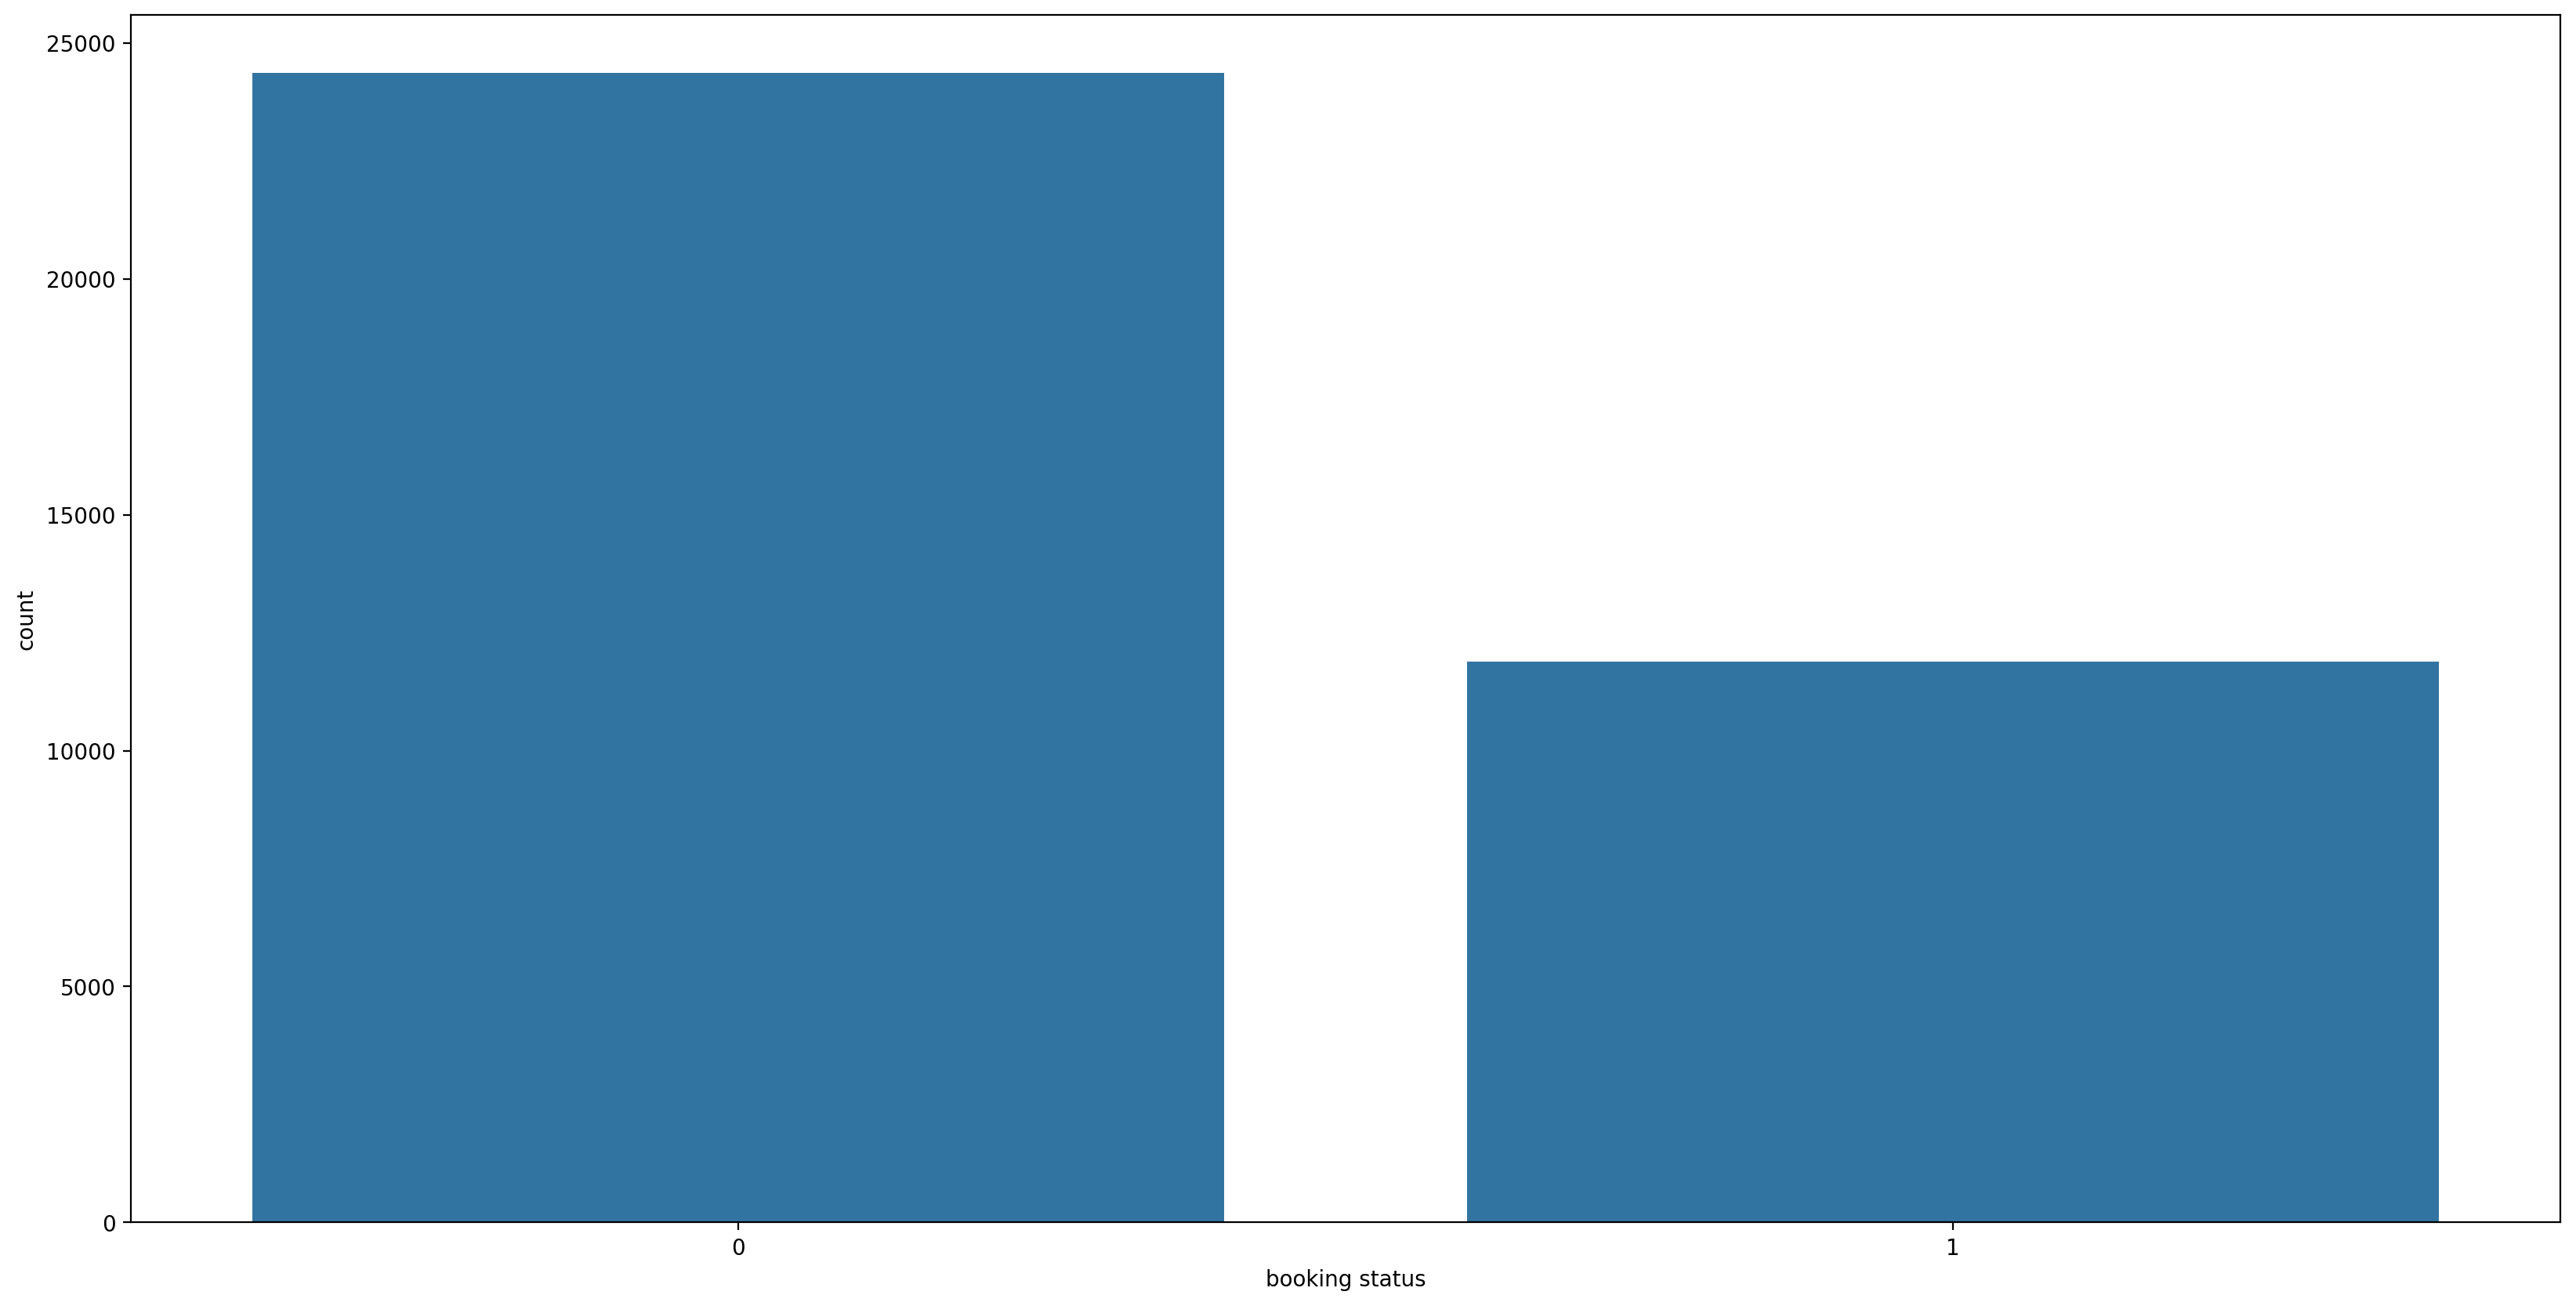

In [1008]:
sns.countplot(x = y) #See the count of how mny people canceled vs how many people did not

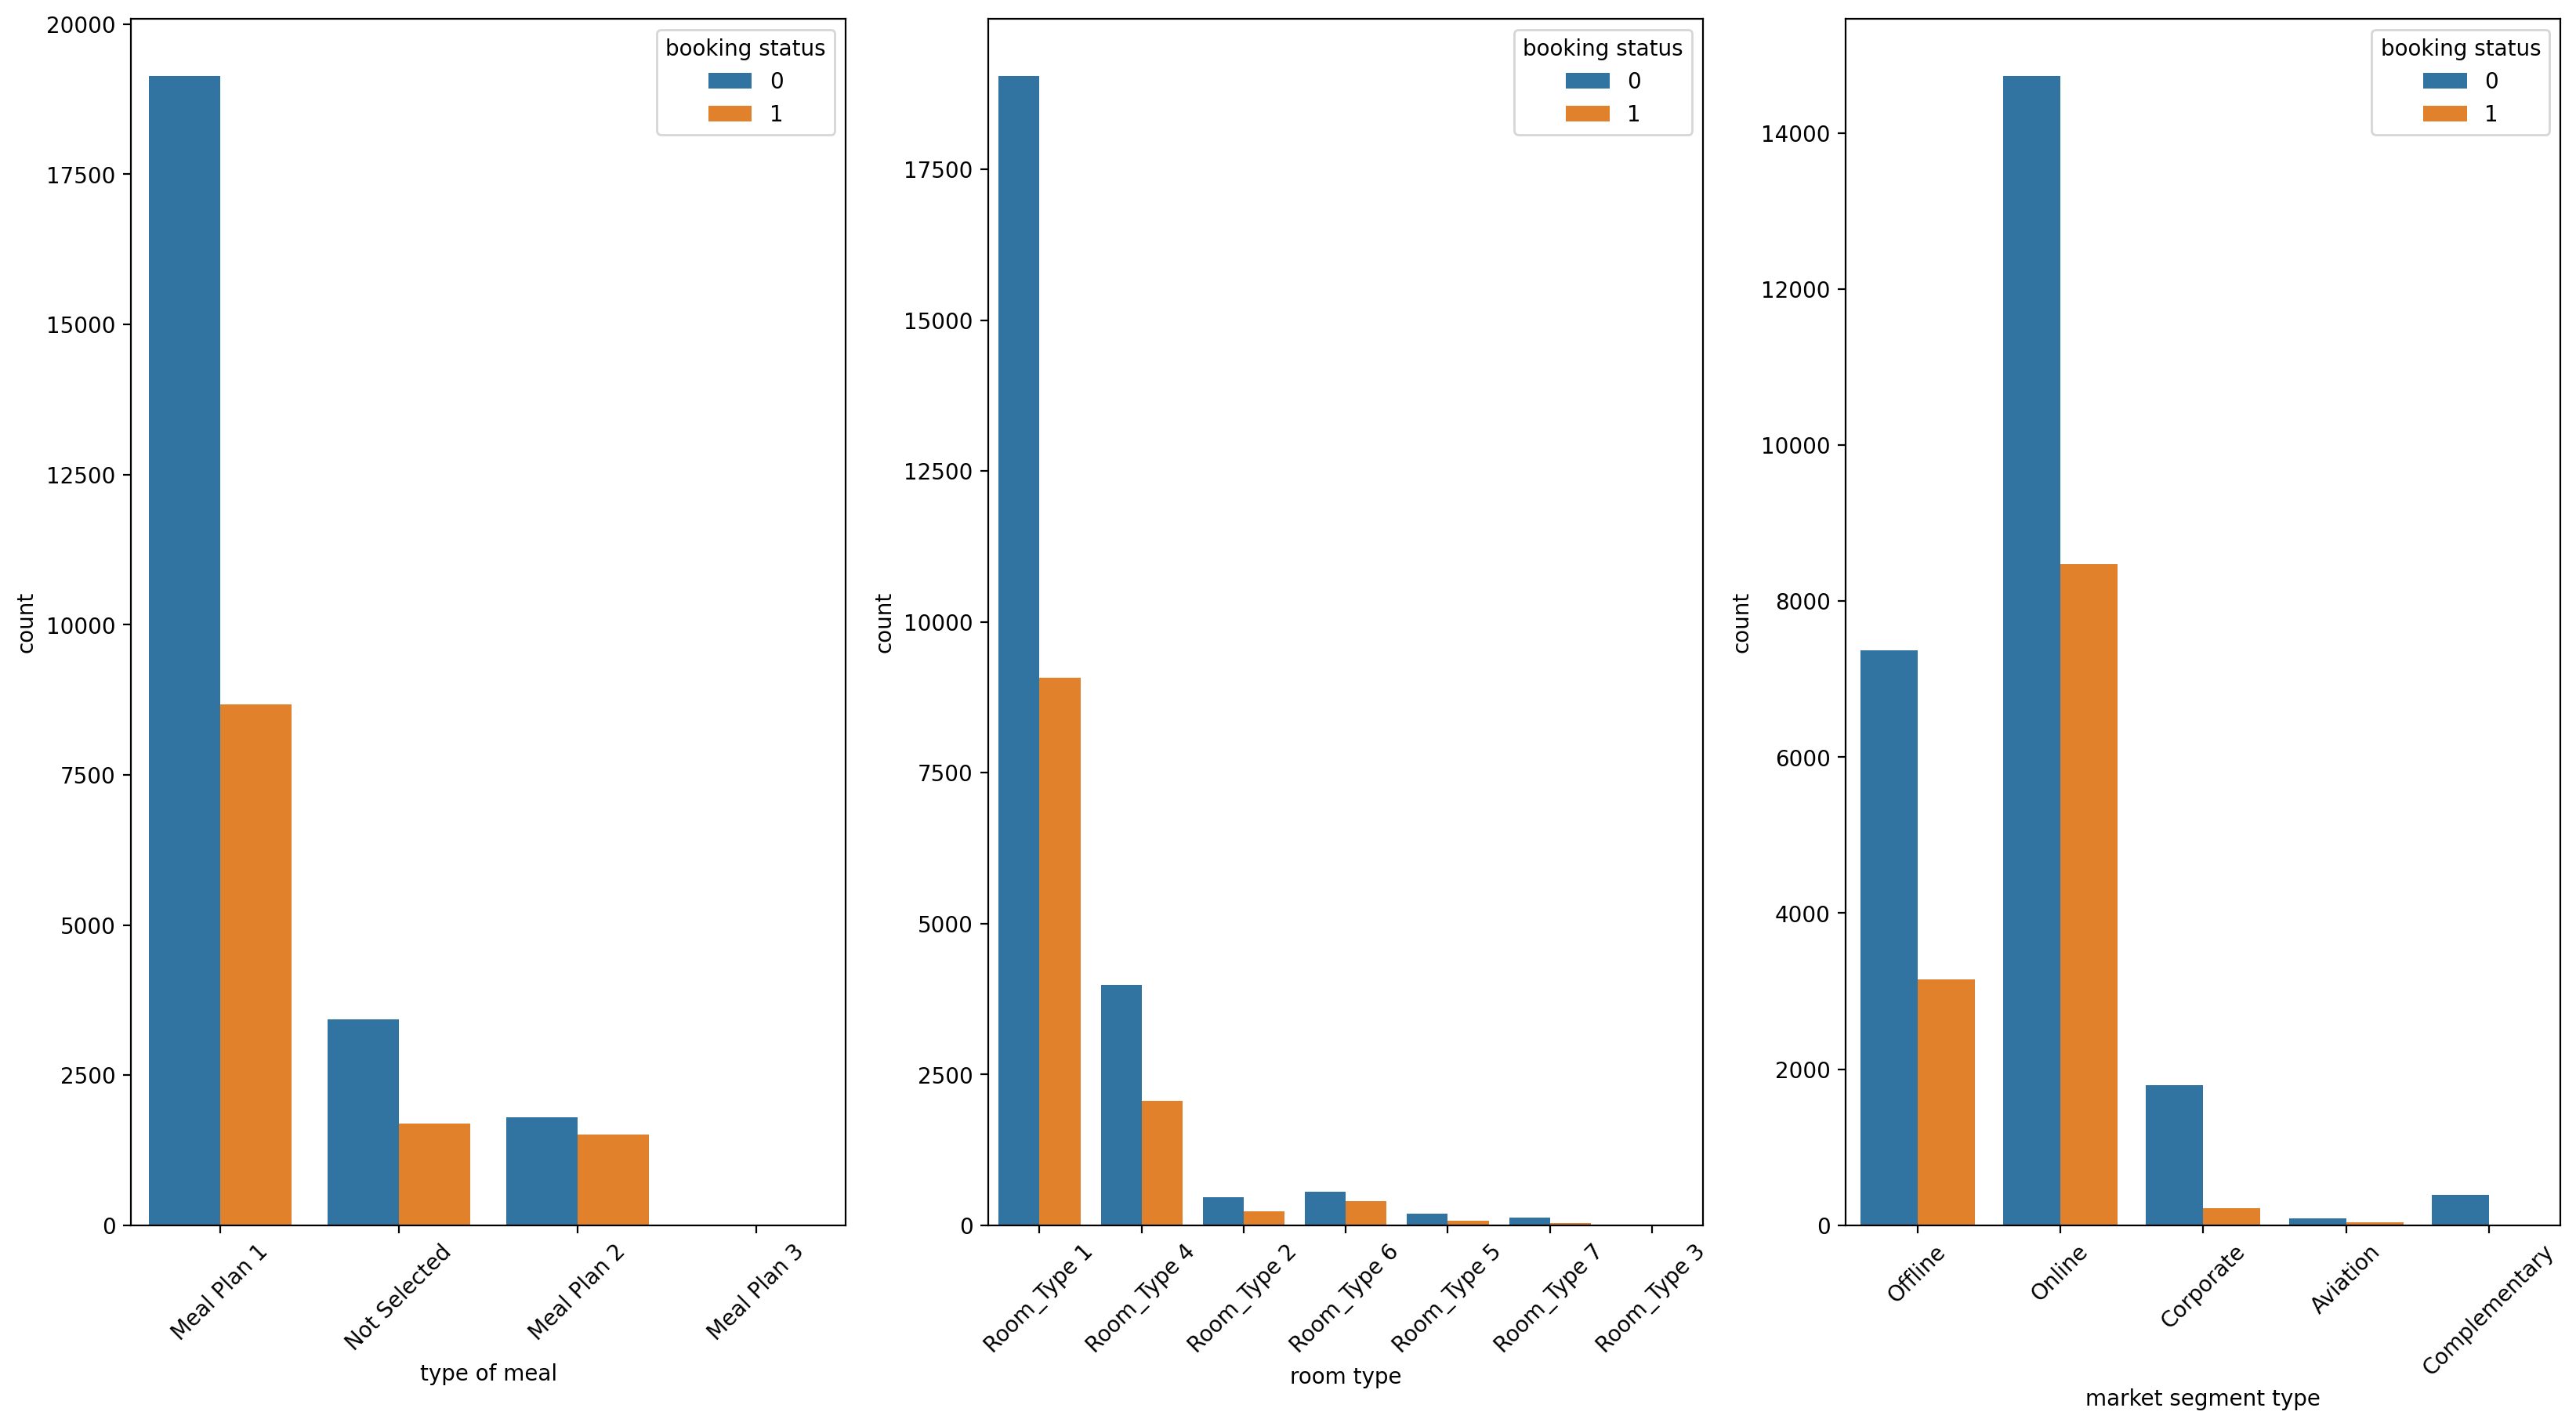

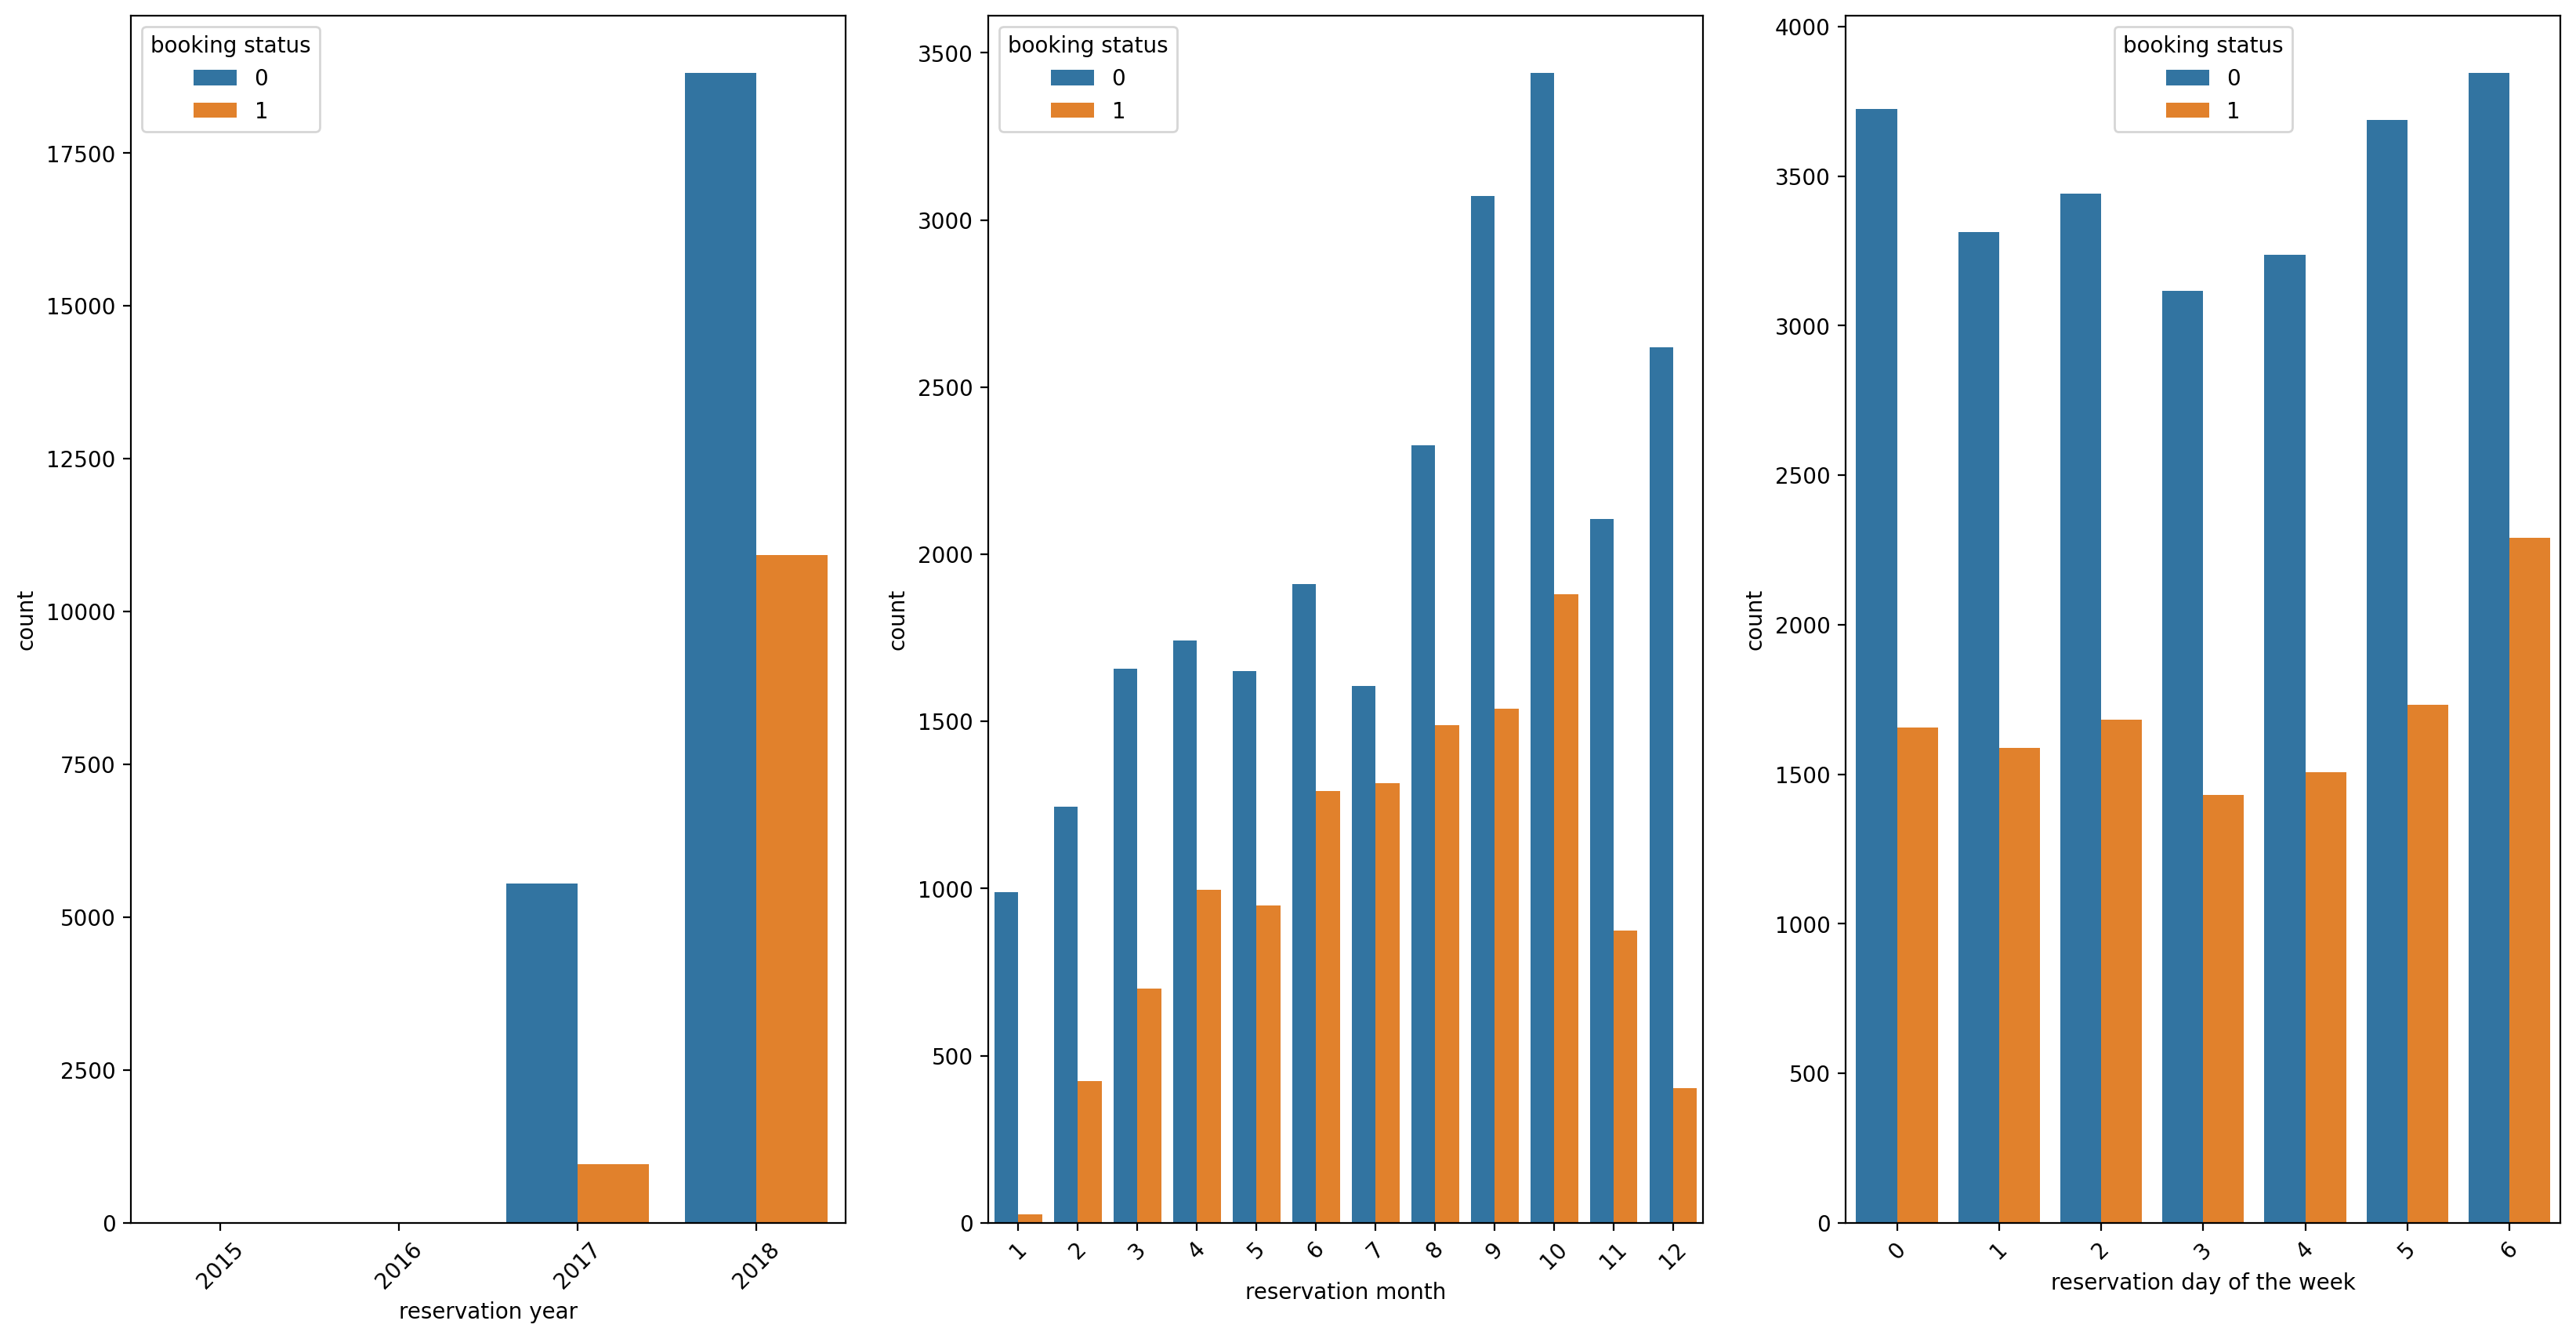

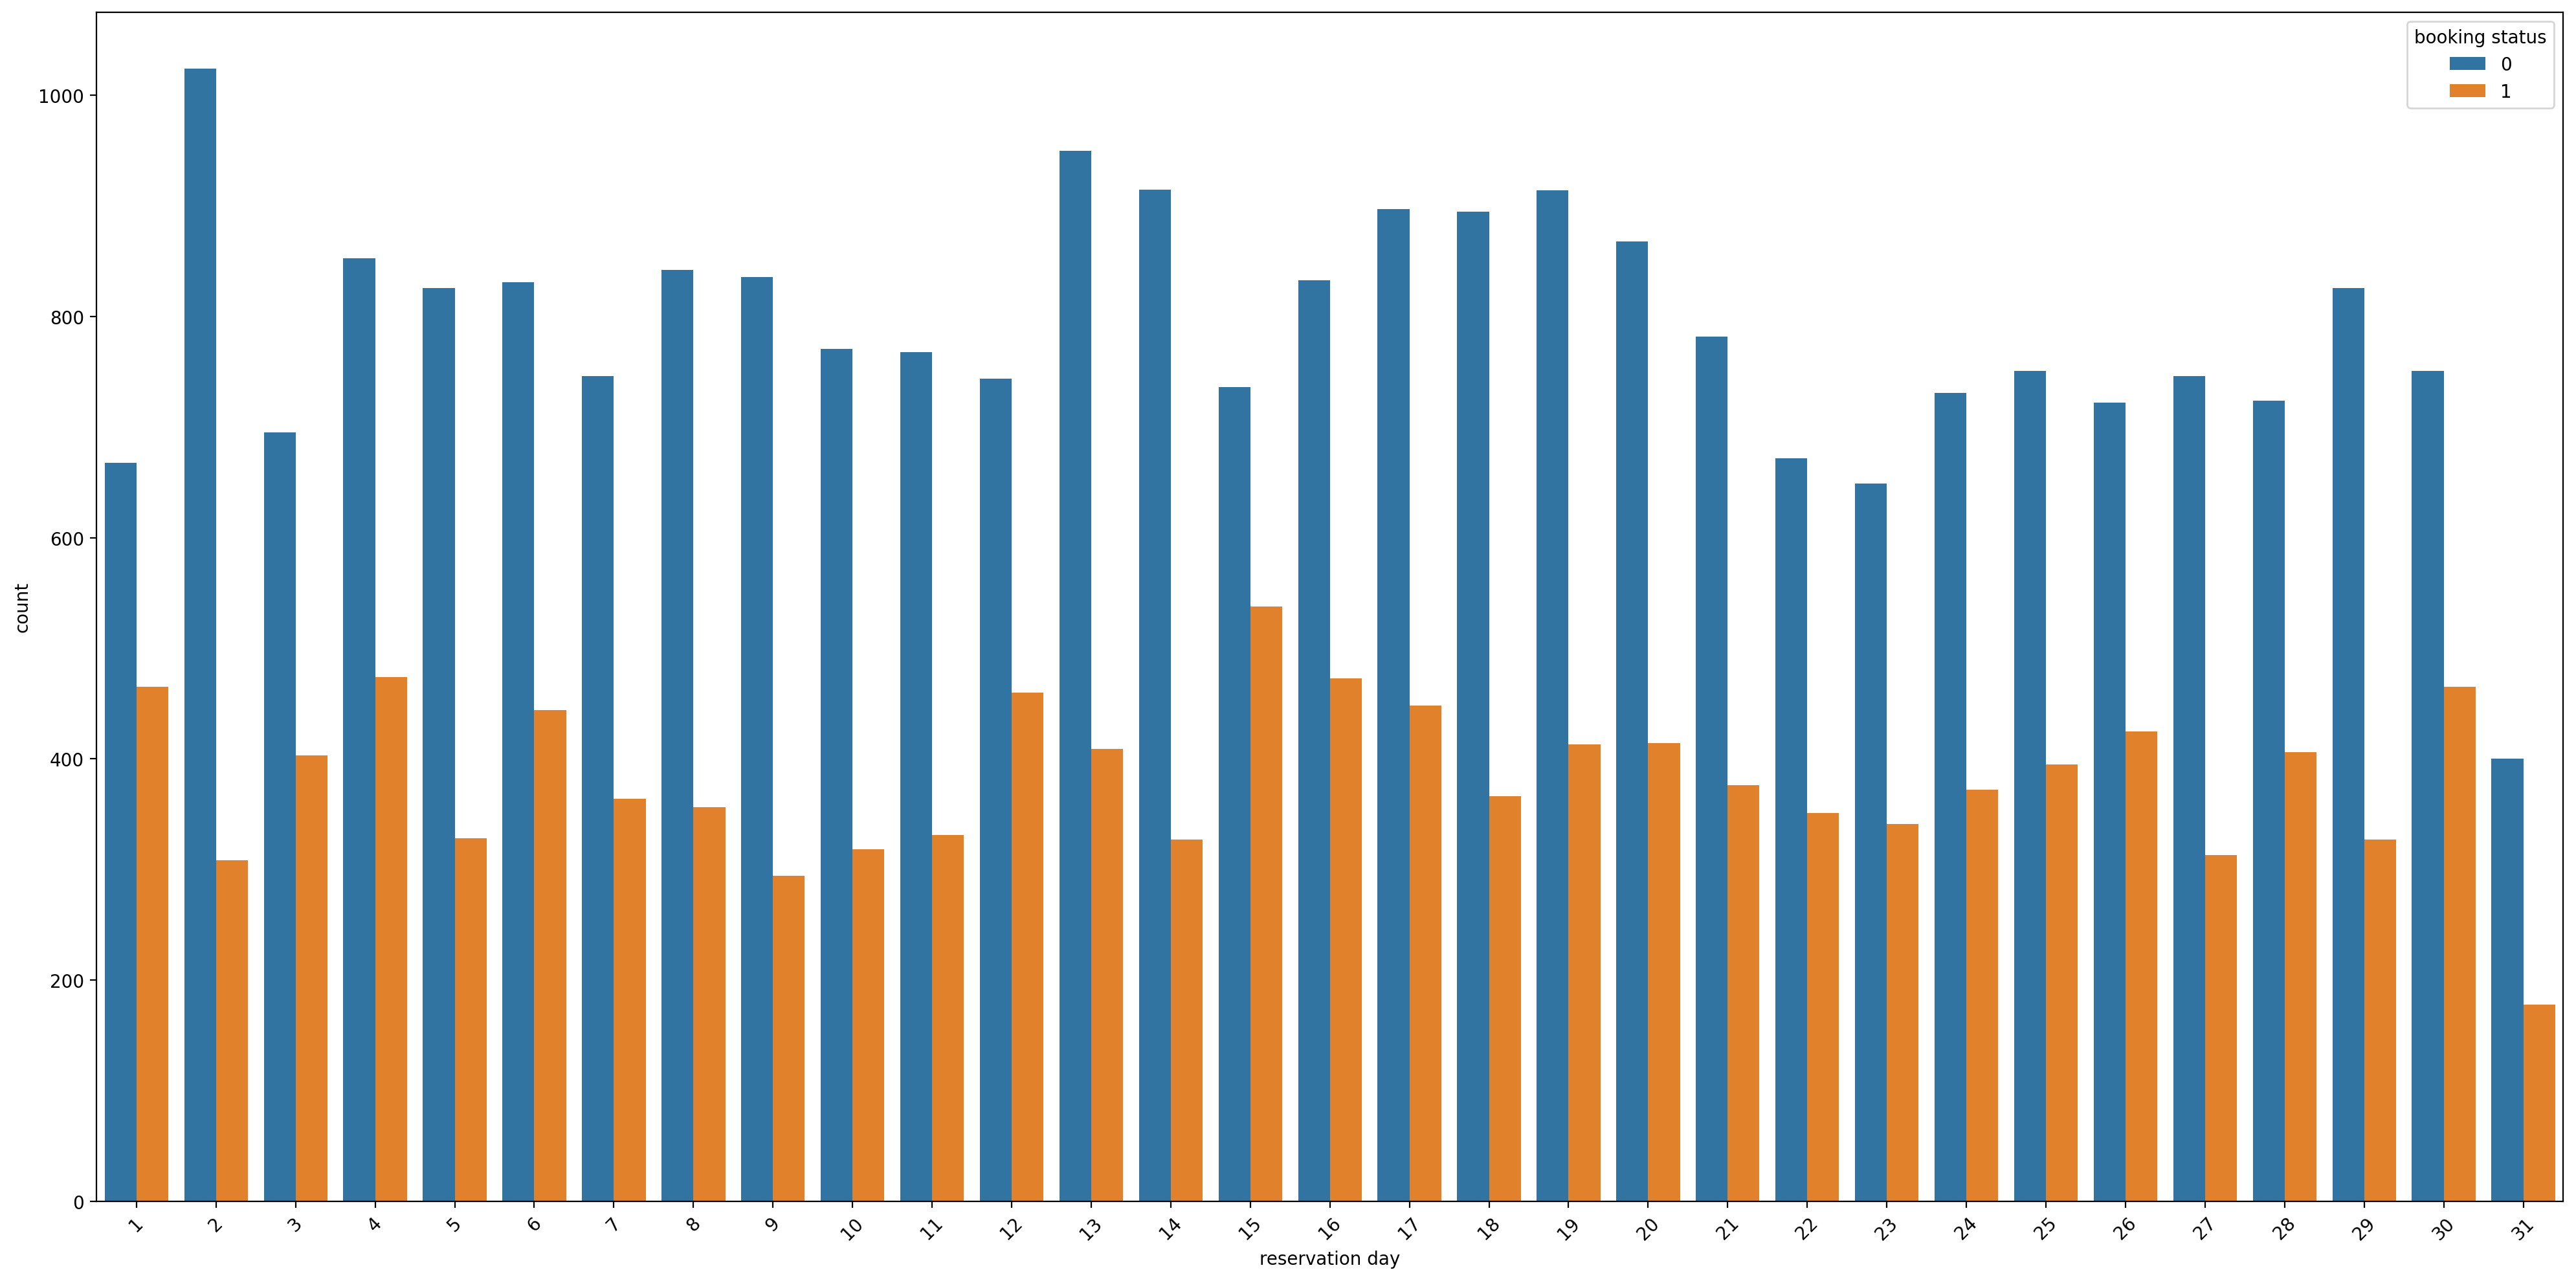

In [1009]:
#Creating statistical plots to see the effects of various categorical variables on booking status

plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['figure.dpi'] = 200
fig, ax1 = plt.subplots(1,3)
fig, ax2 = plt.subplots(1,3)
fig, ax3 = plt.subplots(1,1)
#Plotting categorical/objet columns

sns.countplot(x = 'type of meal', data = X, ax = ax1[0], hue = y)
sns.countplot(x = 'room type', data = X, ax = ax1[1], hue = y)
sns.countplot(x = 'market segment type', data = X, ax = ax1[2], hue = y)
for ax in ax1:
    ax.tick_params(axis='x', rotation=45)

sns.countplot(x = 'reservation year', data = X, ax = ax2[0], hue = y)
sns.countplot(x = 'reservation month', data = X, ax = ax2[1], hue = y)
sns.countplot(x = 'reservation day of the week', data = X, ax = ax2[2], hue = y)
for ax in ax2:
    ax.tick_params(axis='x', rotation=45)

sns.countplot(x = 'reservation day', data = X, ax = ax3, hue = y)
ax3.tick_params(axis='x', rotation=45)
plt.tight_layout()

In [1010]:
X.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'average price', 'special requests', 'reservation year',
       'reservation month', 'reservation day', 'reservation day of the week'],
      dtype='object')

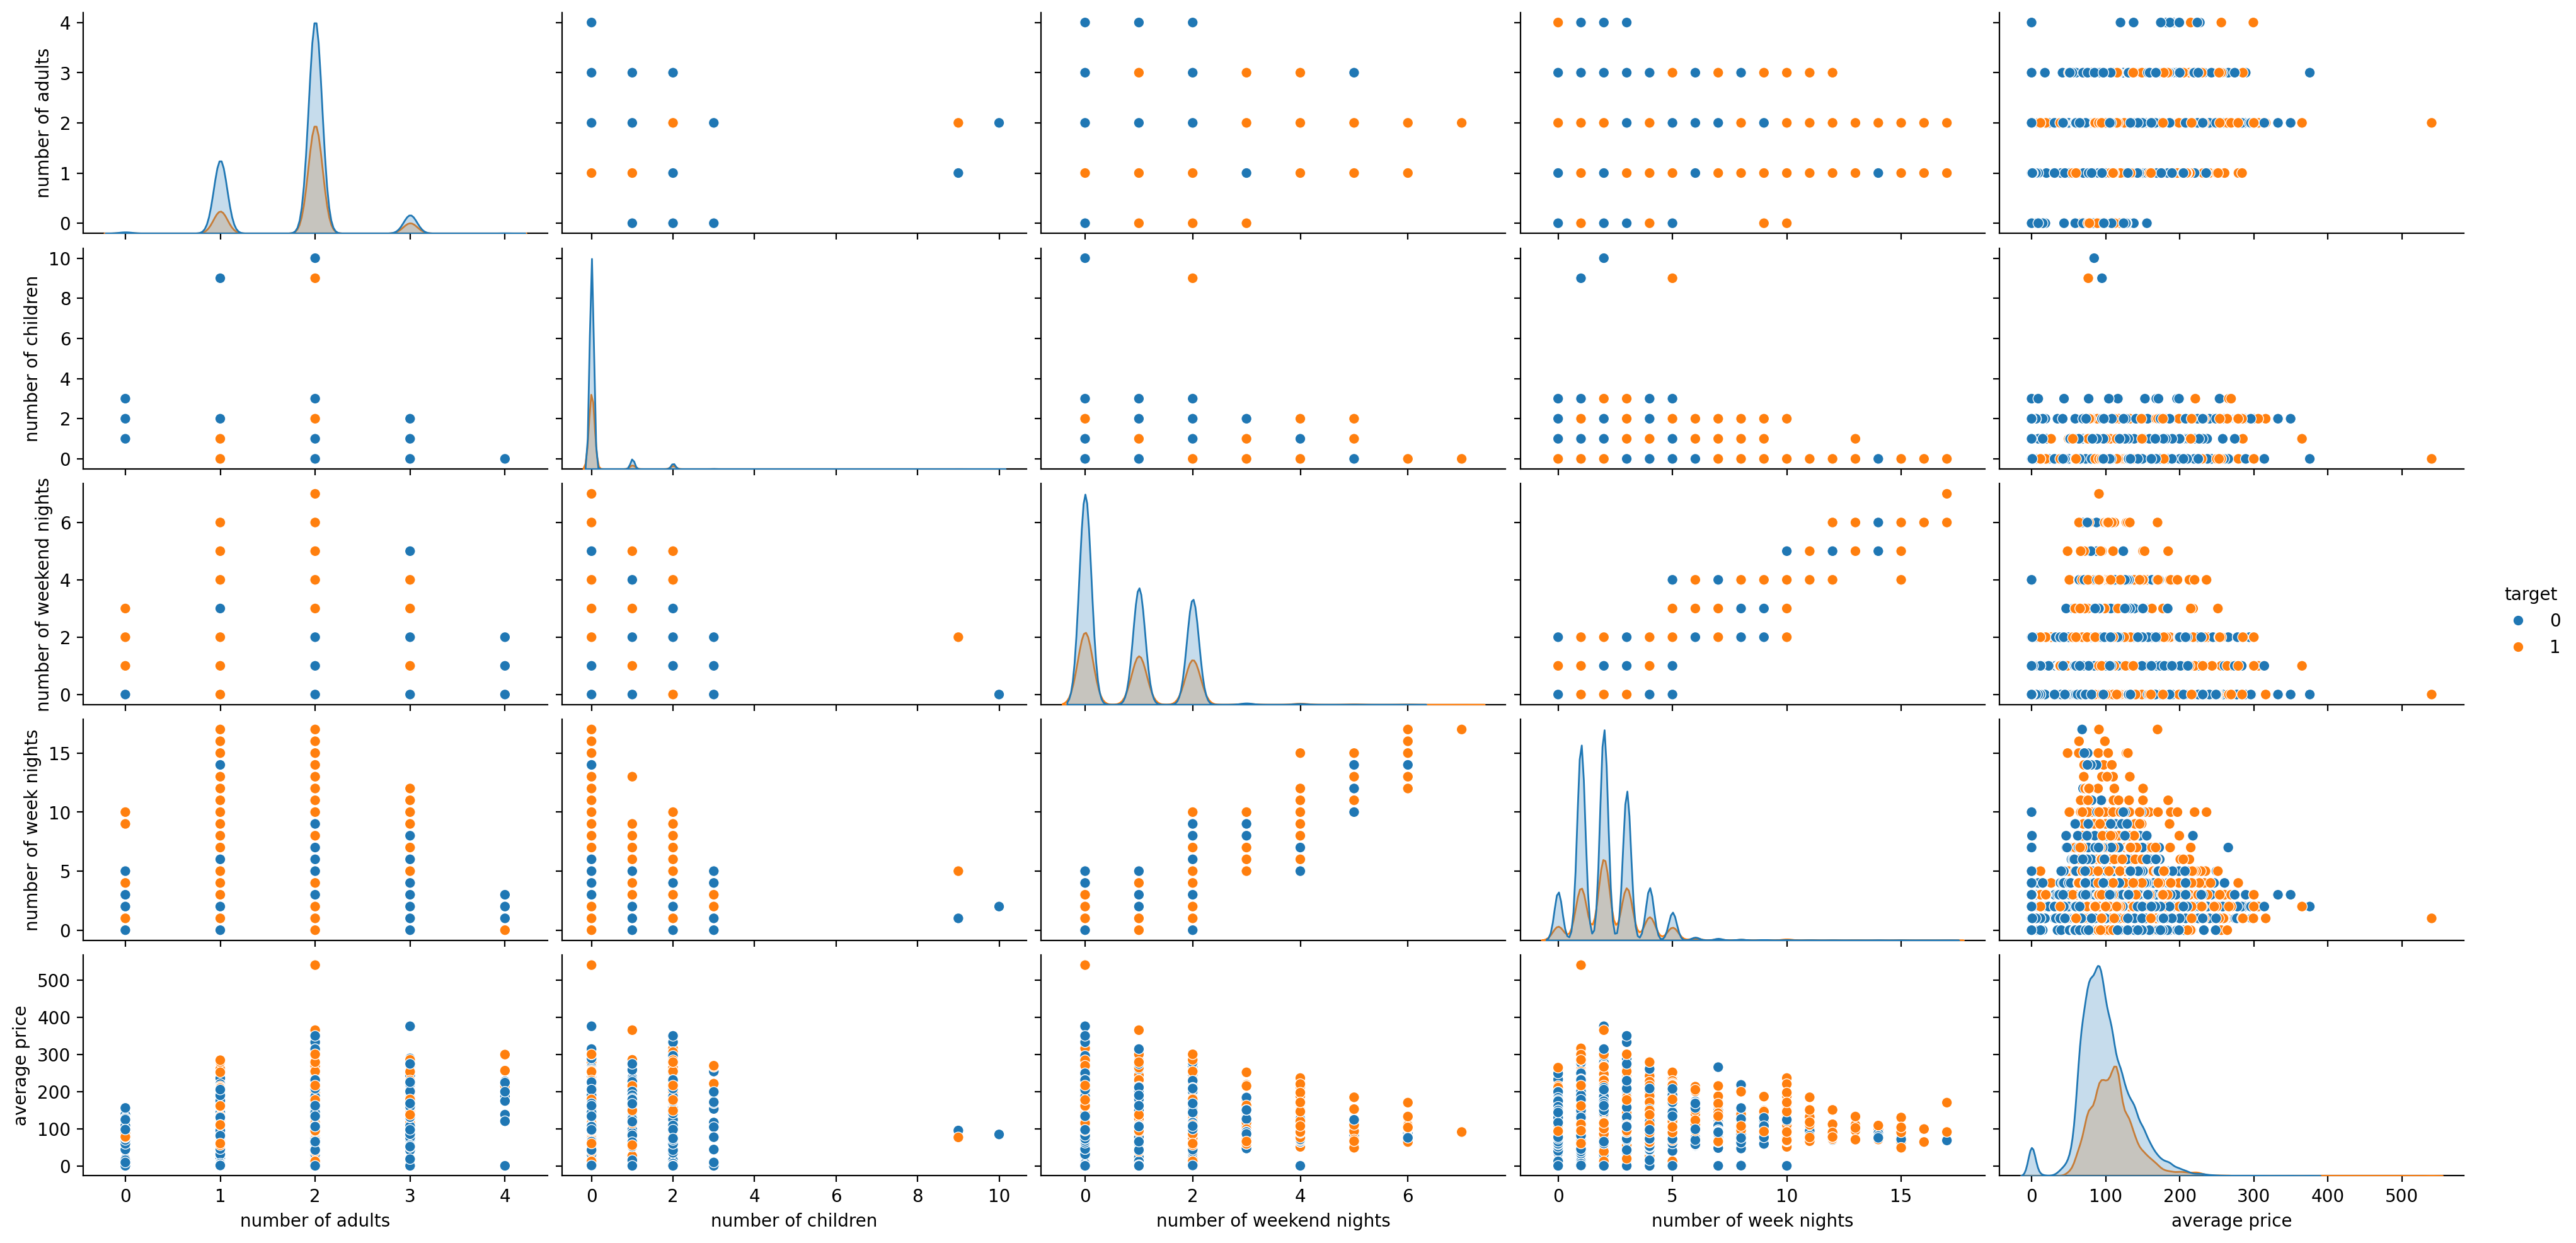

In [1011]:
#Plot some numerical columns to see trends and correlation
dataset_temp = dataset.copy()
dataset_temp['target'] = y
sns.pairplot(dataset_temp, vars = ['number of adults','number of children', 'number of weekend nights', 'number of week nights', 'average price'],
             height = 2, aspect = 2, hue = 'target')

## Data Preprocessing

In [1013]:
# We must use one hot encoding to change the categorical features into numerical features
X_onehot = pd.get_dummies(X, dtype=int, drop_first = True)
X_onehot

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,...,reservation day_28,reservation day_29,reservation day_30,reservation day_31,reservation day of the week_1,reservation day of the week_2,reservation day of the week_3,reservation day of the week_4,reservation day of the week_5,reservation day of the week_6
0,1,1,2,5,0,224,0,0,0,88.00,...,0,0,0,0,0,0,0,1,0,0
1,1,0,1,3,0,5,0,0,0,106.68,...,0,0,0,0,1,0,0,0,0,0
2,2,1,1,3,0,1,0,0,0,50.00,...,1,0,0,0,0,1,0,0,0,0
3,1,0,0,2,0,211,0,0,0,100.00,...,0,0,0,0,0,0,0,0,1,0
4,1,0,1,2,0,48,0,0,0,77.00,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0,2,0,346,0,0,0,115.00,...,0,0,0,0,0,0,1,0,0,0
36281,2,0,1,3,0,34,0,0,0,107.55,...,0,0,0,0,0,0,0,0,0,1
36282,2,0,1,3,0,83,0,0,0,105.61,...,0,0,0,0,0,1,0,0,0,0
36283,3,0,0,4,0,121,0,0,0,96.90,...,0,0,0,0,0,0,0,1,0,0


In [1014]:
X_train, X_test, y_train, y_test = train_test_split(X_onehot, y, test_size = 0.2, random_state = 42, stratify = y)

In [1015]:
#Transforming both X_train and X_test to scale the data to make te mean 0 and standard deviation 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [1016]:
X_train

array([[ 0.30029043, -0.26008148, -0.92992768, ...,  2.57781609,
        -0.42027148, -0.45297551],
       [ 2.22552186, -0.26008148, -0.92992768, ..., -0.38792527,
        -0.42027148,  2.20762484],
       [-1.62494101, -0.26008148,  1.36368828, ..., -0.38792527,
        -0.42027148, -0.45297551],
       ...,
       [ 0.30029043,  4.68214838,  1.36368828, ..., -0.38792527,
        -0.42027148, -0.45297551],
       [ 0.30029043, -0.26008148,  0.2168803 , ..., -0.38792527,
        -0.42027148, -0.45297551],
       [ 0.30029043, -0.26008148, -0.92992768, ...,  2.57781609,
        -0.42027148, -0.45297551]])

In [1017]:
X_test

array([[ 0.29131991, -0.26771295, -0.93309514, ..., -0.38832158,
        -0.41541539, -0.44513938],
       [ 0.29131991, -0.26771295,  1.37457662, ..., -0.38832158,
        -0.41541539, -0.44513938],
       [ 0.29131991, -0.26771295, -0.93309514, ..., -0.38832158,
        -0.41541539,  2.24648739],
       ...,
       [ 2.23077753, -0.26771295,  1.37457662, ..., -0.38832158,
        -0.41541539, -0.44513938],
       [ 0.29131991, -0.26771295, -0.93309514, ..., -0.38832158,
        -0.41541539,  2.24648739],
       [ 0.29131991, -0.26771295, -0.93309514, ..., -0.38832158,
         2.40722904, -0.44513938]])

In [1018]:
print(X_train.shape)
print(X_test.shape)

(28998, 74)
(7250, 74)


In [1019]:
y.value_counts()

booking status
0    24366
1    11882
Name: count, dtype: int64

In [1020]:
class_weight = y.value_counts().to_dict()
class_weight

{0: 24366, 1: 11882}

In [1021]:
total_sample = sum(class_weight.values())
total_sample

36248

In [1022]:
#Calculating the weight for each class
class_weight = [total_sample/(len(class_weight)*class_weight[0]),
                total_sample/(len(class_weight)*class_weight[1])]
class_weight

[0.7438233604202578, 1.5253324356168996]

In [1023]:
# As we can see, the contribution from class 0 to the loss function will be reduced
# While the contribution from class 1 will be incresed

In [1024]:
input_shape = X_train.shape[1:]
input_shape

(74,)

## NN

In [1026]:
#Creating NN model
model = Sequential()
model.add(InputLayer(input_shape))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3)) #Adding a 30% dropout rate
model.add(BatchNormalization()) # Adding batch normalization to aid network optimization

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(1, activation = 'sigmoid'))

In [1027]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 128)                 │           9,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,265 (106.50 KB)

 Trainable params: 26,753 (104.50 KB)

 Non-trainable params: 512 (2.00 KB)

In [1028]:
model.compile(optimizer=Adam(learning_rate=0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [1029]:
# Calculating class weight due to the disparity in target quantity
class_weight = {0:0.7438233604202578, 1:1.5253324356168996}
early_stopping = EarlyStopping(monitor='val_loss', patience=5,restore_best_weights = True )

In [1030]:
history = model.fit(X_train, y_train.values, batch_size = 32, epochs = 10, class_weight = class_weight, validation_split = 0.15, 
                    callbacks = [early_stopping])

Epoch 1/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7232 - loss: 0.5477 - val_accuracy: 0.7807 - val_loss: 0.4471
Epoch 2/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7899 - loss: 0.4383 - val_accuracy: 0.8159 - val_loss: 0.3881
Epoch 3/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8059 - loss: 0.4188 - val_accuracy: 0.8090 - val_loss: 0.4003
Epoch 4/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8043 - loss: 0.4120 - val_accuracy: 0.8248 - val_loss: 0.3691
Epoch 5/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8099 - loss: 0.4002 - val_accuracy: 0.8246 - val_loss: 0.3825
Epoch 6/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8131 - loss: 0.4000 - val_accuracy: 0.8108 - val_loss: 0.4095
Epoch 7/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8101 - loss: 0.3920 - val_accuracy: 0.7807 - val_loss: 0.4381
Epoch 8/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8114 - loss: 0.3863 - val_accuracy: 0.

In [1031]:
history.history

{'accuracy': [0.7575056552886963,
  0.7888267040252686,
  0.8010386228561401,
  0.8051769137382507,
  0.8087877035140991,
  0.8132100105285645,
  0.8117899894714355,
  0.8141025900840759,
  0.8145488500595093,
  0.8138185739517212],
 'loss': [0.4895237982273102,
  0.4401401877403259,
  0.42328450083732605,
  0.4143228530883789,
  0.406349778175354,
  0.40237540006637573,
  0.39609605073928833,
  0.3858237564563751,
  0.390841007232666,
  0.3902713358402252],
 'val_accuracy': [0.7806896567344666,
  0.8158620595932007,
  0.8089655041694641,
  0.8248276114463806,
  0.8245977163314819,
  0.8108046054840088,
  0.7806896567344666,
  0.8448275923728943,
  0.794252872467041,
  0.8427585959434509],
 'val_loss': [0.4471433162689209,
  0.3880802094936371,
  0.4002505838871002,
  0.36913493275642395,
  0.38248372077941895,
  0.40945690870285034,
  0.43807291984558105,
  0.366163969039917,
  0.4341648519039154,
  0.349950909614563]}

In [1032]:
hist = pd.DataFrame(history.history)
hist

,accuracy,loss,val_accuracy,val_loss
0,0.757506,0.489524,0.780690,0.447143
1,0.788827,0.440140,0.815862,0.388080
2,0.801039,0.423285,0.808966,0.400251
3,0.805177,0.414323,0.824828,0.369135
4,0.808788,0.406350,0.824598,0.382484
5,0.813210,0.402375,0.810805,0.409457
6,0.811790,0.396096,0.780690,0.438073
7,0.814103,0.385824,0.844828,0.366164
8,0.814549,0.390841,0.794253,0.434165
9,0.813819,0.390271,0.842759,0.349951


<Axes: >

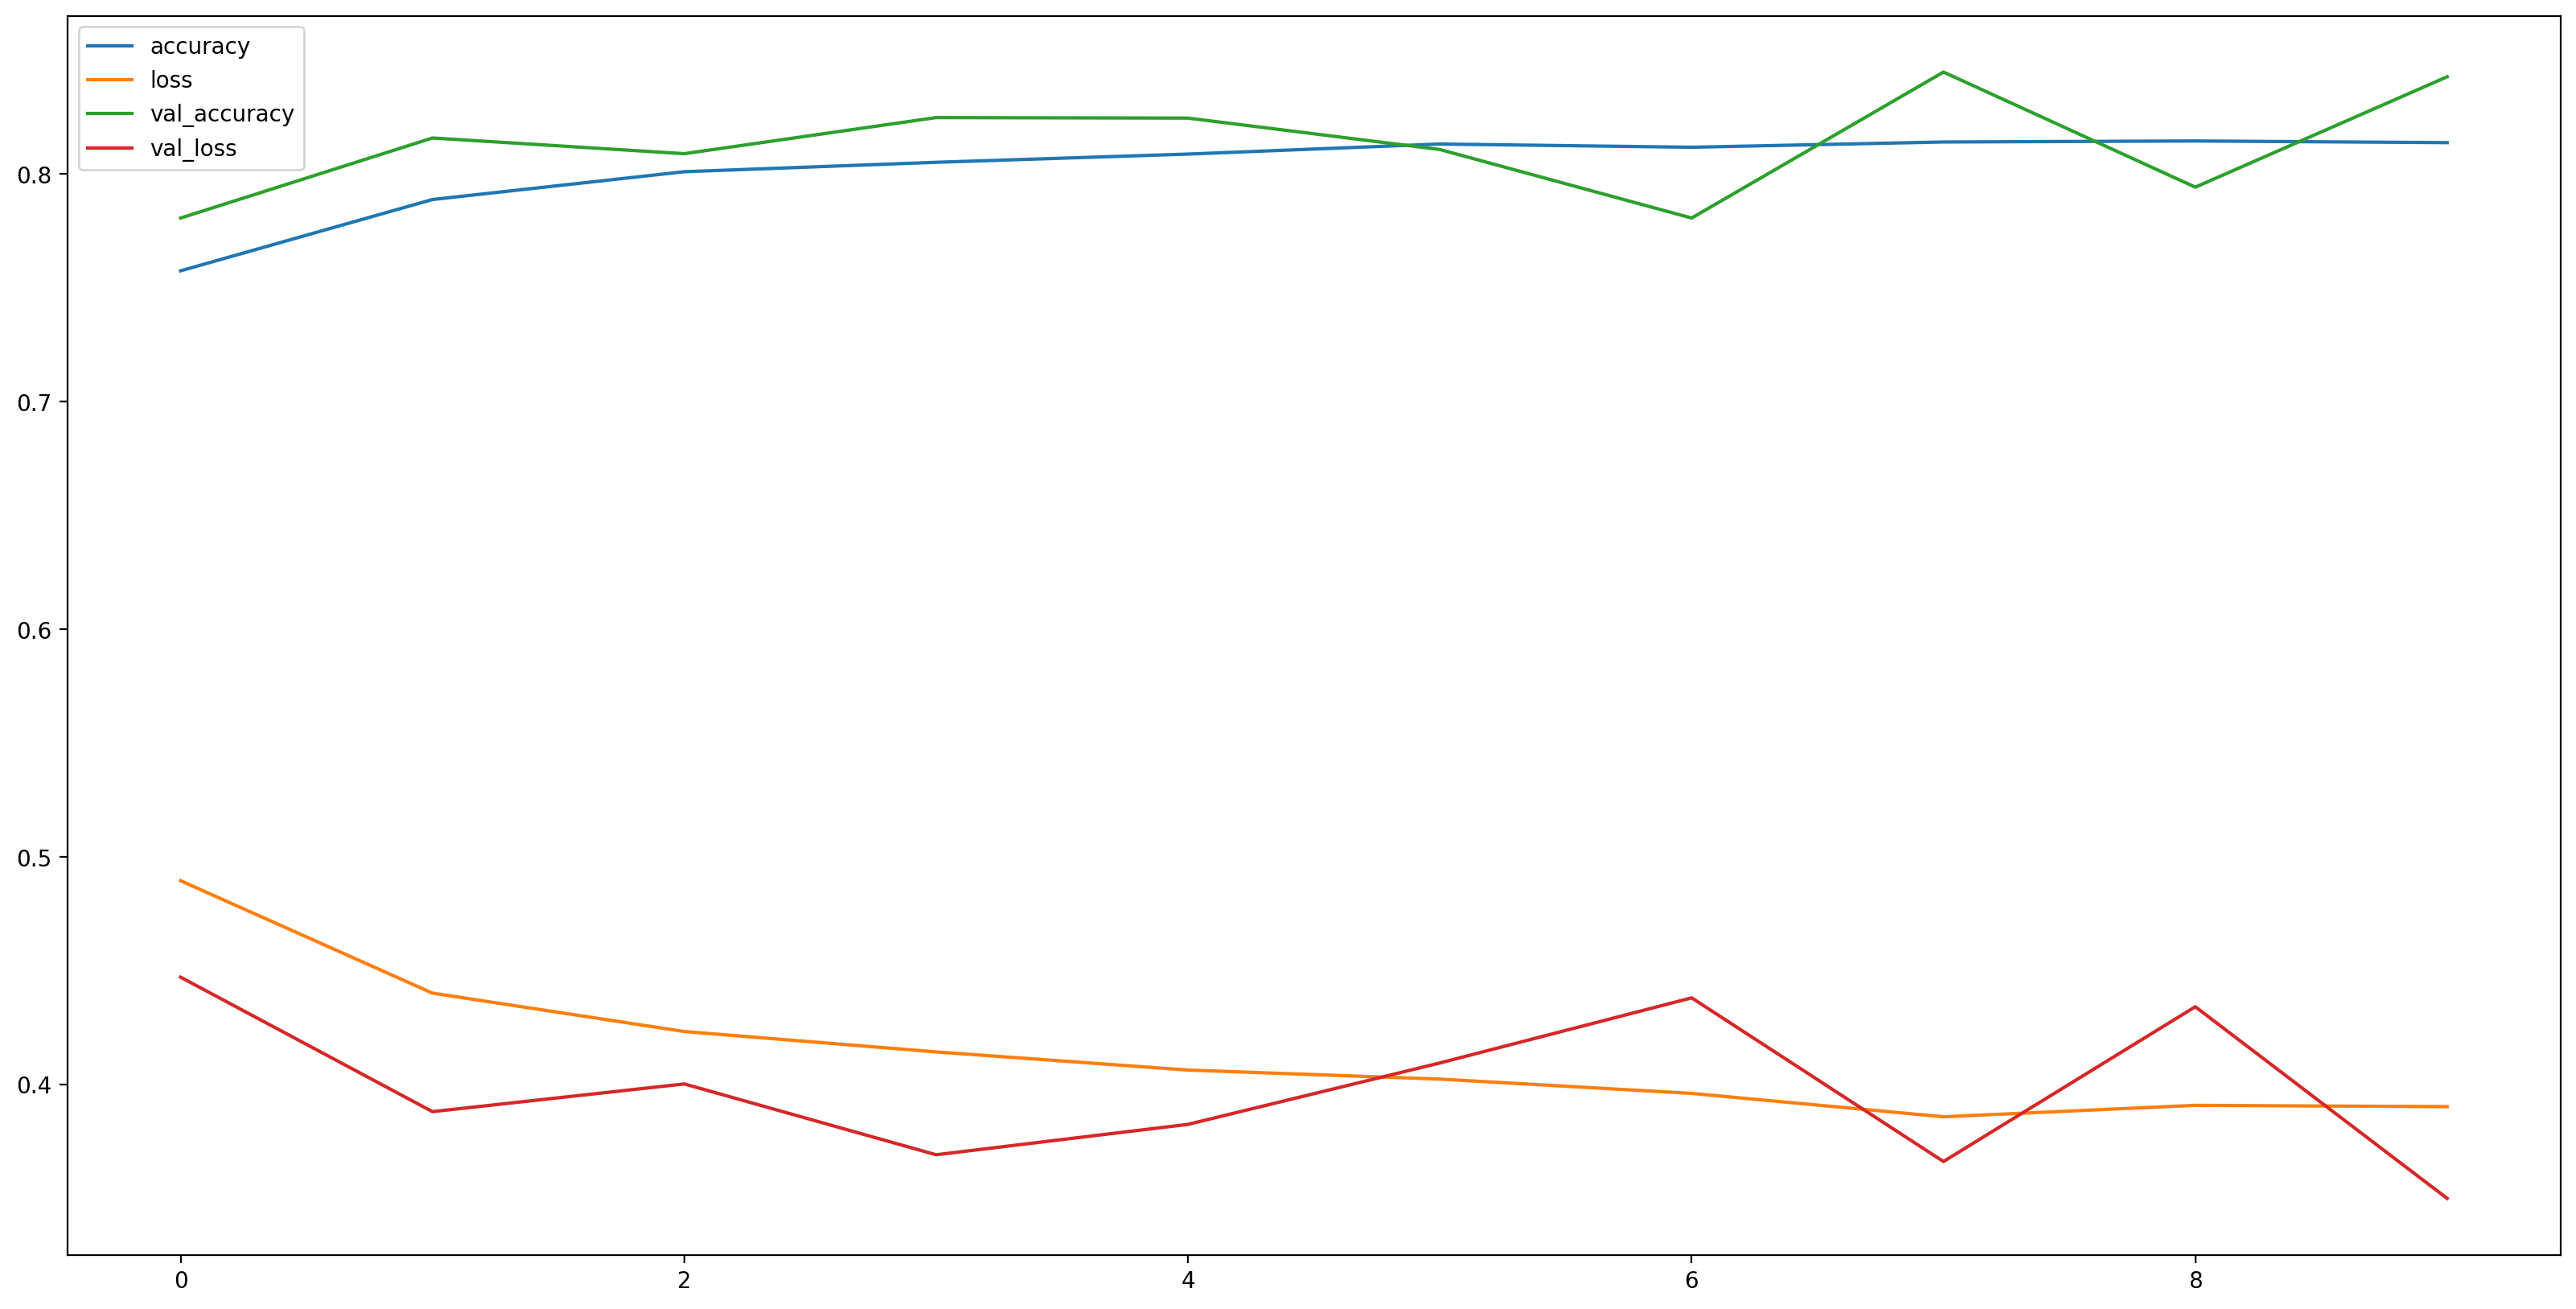

In [1033]:
#Plotting a loss vs accuracy plot to see trend
hist.plot()

In [1034]:
y_pred = model.predict(X_test)
y_pred

227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.01090005],
       [0.6312276 ],
       [0.4423049 ],
       ...,
       [0.04877178],
       [0.9618236 ],
       [0.93735856]], dtype=float32)

In [1035]:
y_pred_int = (y_pred>0.5).astype(int)
y_pred_int

array([[0],
       [1],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [1036]:
#Printing the classification report to evaluate f1 score and accuracy of the model
print(classification_report(y_test, y_pred_int))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      4873
           1       0.73      0.79      0.76      2377

    accuracy                           0.84      7250
   macro avg       0.81      0.83      0.82      7250
weighted avg       0.84      0.84      0.84      7250



## Second Model

In [1038]:
#Creating a second model
model2 = Sequential()
model2.add(InputLayer(input_shape))
model2.add(Dense(256, activation = 'leaky_relu'))
model2.add(Dropout(0.4))
model2.add(BatchNormalization())

model2.add(Dense(256, activation = 'leaky_relu'))
model2.add(Dropout(0.4))
model2.add(BatchNormalization())

model2.add(Dense(1, activation = 'sigmoid'))

In [1039]:
model2.compile(optimizer=Adam(learning_rate=0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5,restore_best_weights = True )

In [1040]:
history2 = model2.fit(X_train, y_train.values, batch_size = 32, epochs = 10, class_weight = class_weight, validation_split = 0.15, 
                    callbacks = [early_stopping])

Epoch 1/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7312 - loss: 0.5648 - val_accuracy: 0.8108 - val_loss: 0.4180
Epoch 2/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7858 - loss: 0.4489 - val_accuracy: 0.7818 - val_loss: 0.4490
Epoch 3/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7928 - loss: 0.4372 - val_accuracy: 0.8103 - val_loss: 0.4009
Epoch 4/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7915 - loss: 0.4336 - val_accuracy: 0.8064 - val_loss: 0.4113
Epoch 5/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7905 - loss: 0.4270 - val_accuracy: 0.7733 - val_loss: 0.4636
Epoch 6/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7977 - loss: 0.4183 - val_accuracy: 0.8037 - val_loss: 0.4089
Epoch 7/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7977 - loss: 0.4180 - val_accuracy: 0.8117 - val_loss: 0.4020
Epoch 8/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8023 - loss: 0.4126 - val_accuracy: 0.

In [1041]:
hist2 = pd.DataFrame(history2.history)
hist2

,accuracy,loss,val_accuracy,val_loss
0,0.758398,0.502050,0.810805,0.417973
1,0.780834,0.452523,0.781839,0.449043
2,0.787934,0.442291,0.810345,0.400882
3,0.789963,0.436060,0.806437,0.411312
4,0.795480,0.425205,0.773333,0.463601
5,0.798036,0.422352,0.803678,0.408922
6,0.799010,0.419169,0.811724,0.402002
7,0.802337,0.411923,0.812184,0.384475
8,0.801485,0.414497,0.799540,0.423436
9,0.807327,0.407861,0.829195,0.354502


<Axes: >

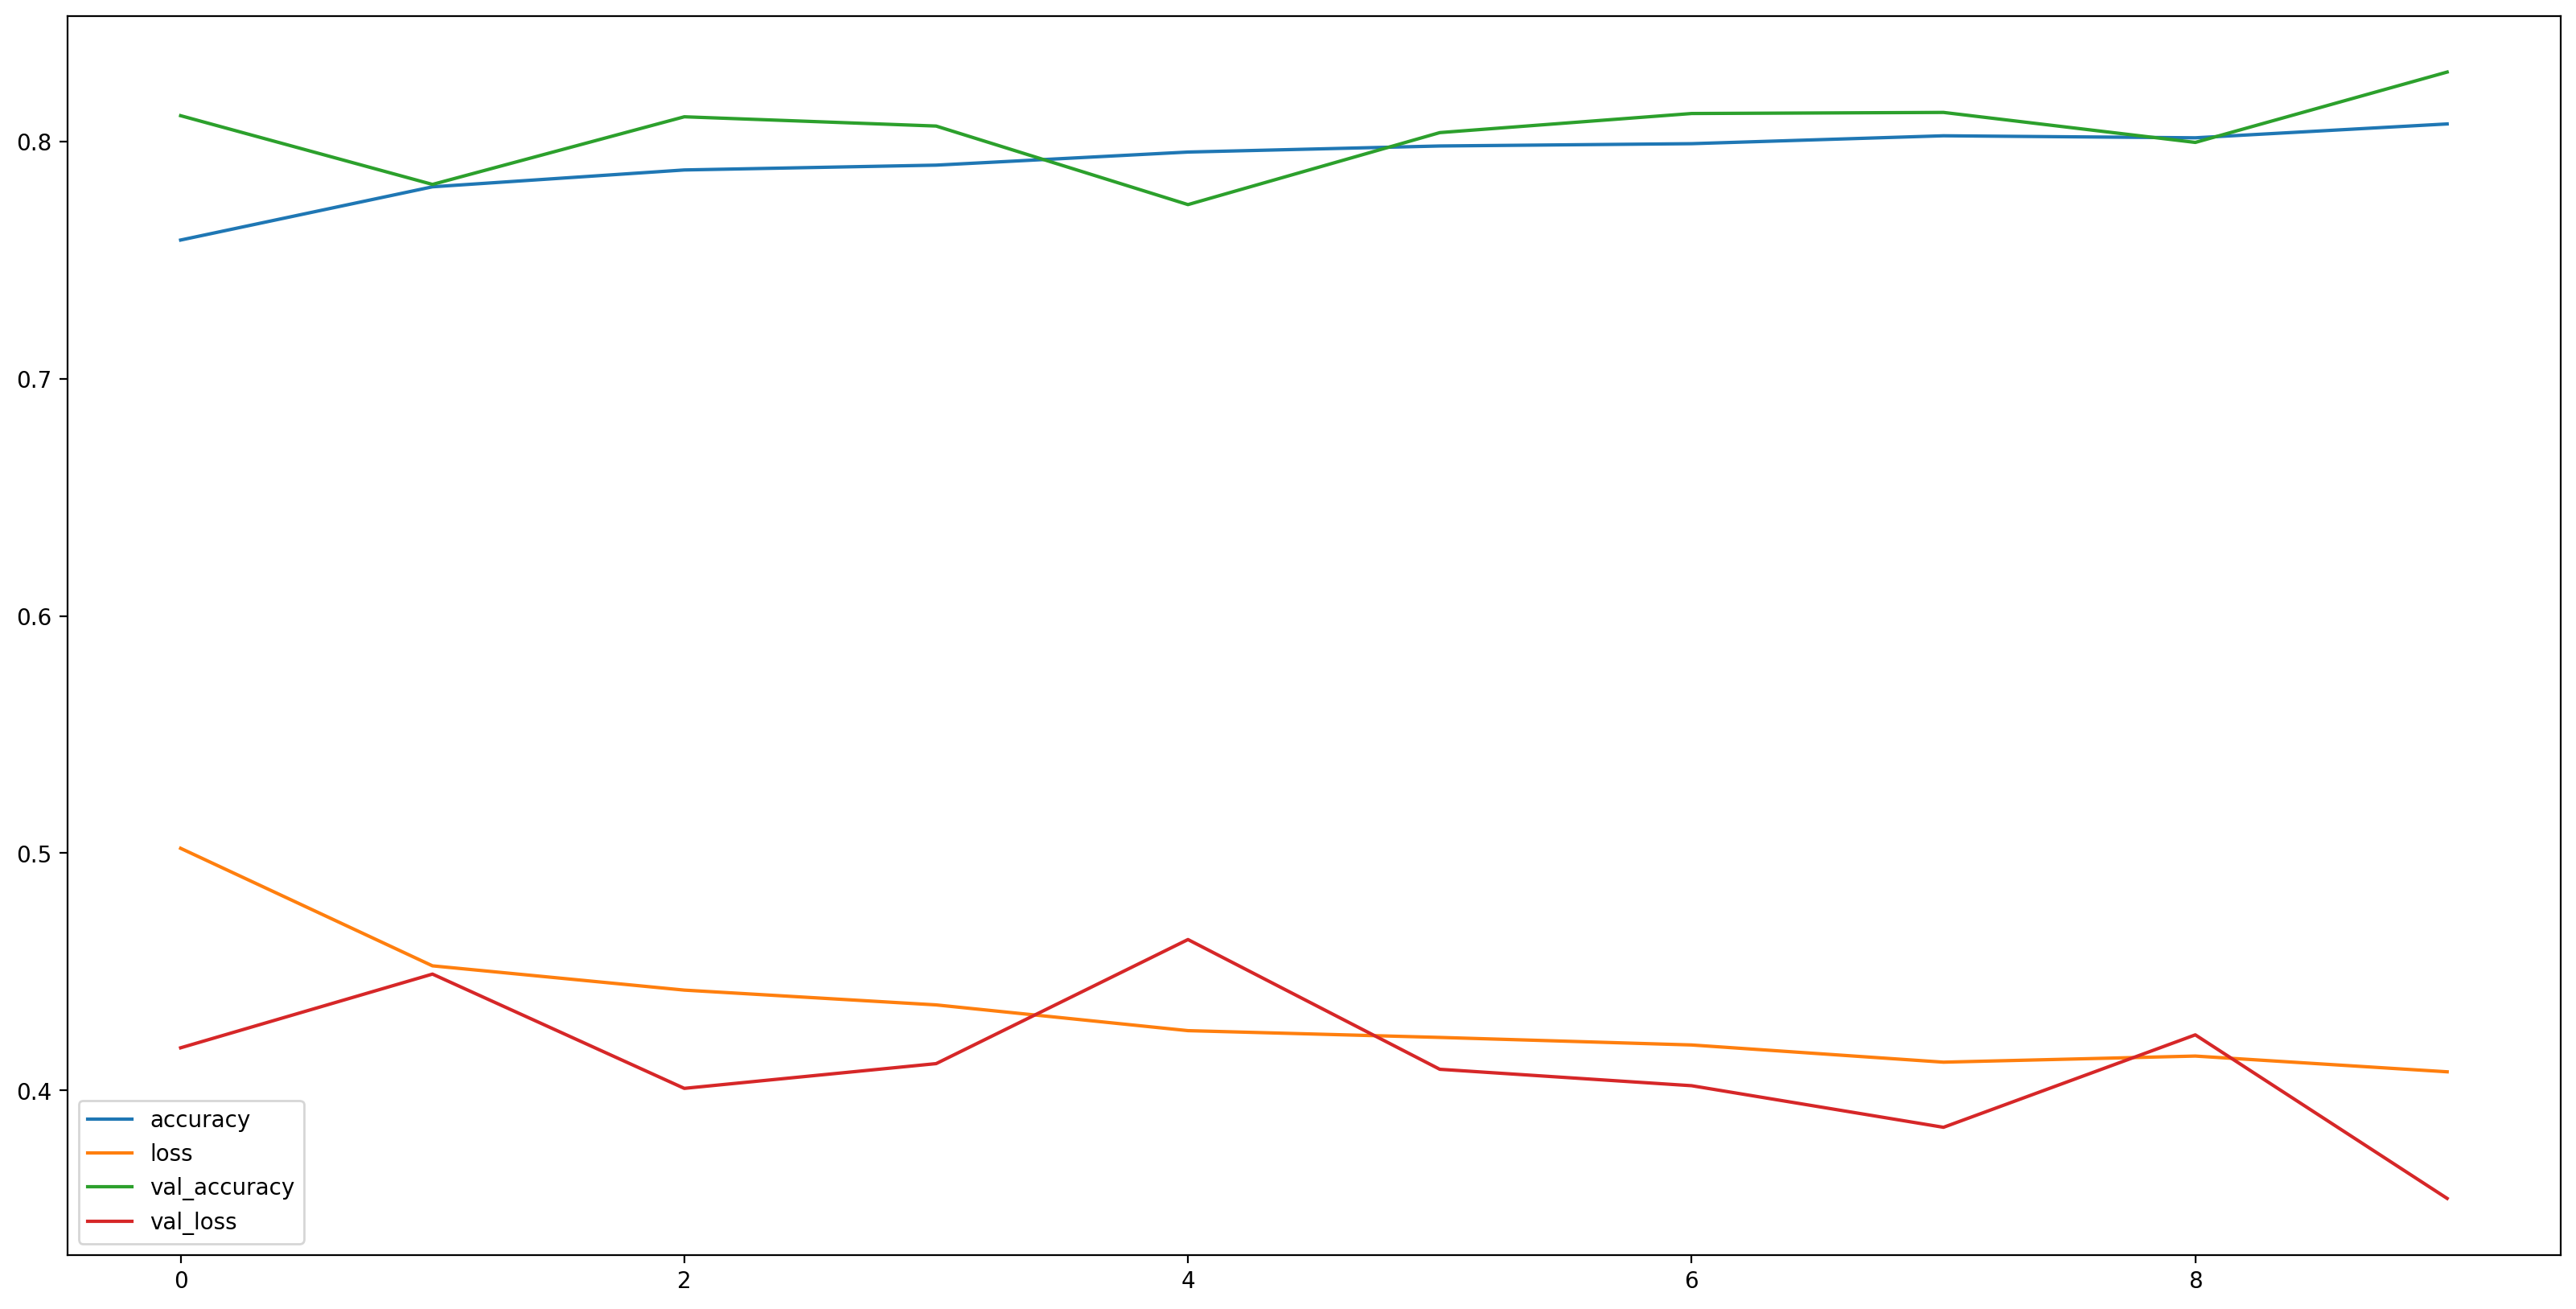

In [1042]:
hist2.plot()

In [1043]:
y_pred2 = model2.predict(X_test)
y_pred_int = (y_pred>0.5).astype(int)

227/227 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step


In [1044]:
#Printing the classification report to evaluate f1 score and accuracy of the model
print(classification_report(y_test, y_pred_int))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      4873
           1       0.73      0.79      0.76      2377

    accuracy                           0.84      7250
   macro avg       0.81      0.83      0.82      7250
weighted avg       0.84      0.84      0.84      7250



## Ensemble model using Logistic regression

In [1046]:
#Generating predictions from the base model
y_pred_train = model.predict(X_train)
y_pred_train2 = model2.predict(X_train)

907/907 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
907/907 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [1047]:
#Stacking the predictions
stacked_train_pred = np.hstack((y_pred_train, y_pred_train2))
stacked_test_pred = np.hstack((y_pred,y_pred2))

In [1048]:
print("Example stacked predictions for a single sample from the test set:")
print("Model 1 predictions:", y_pred[0])
print("Model 2 predictions:", y_pred2[0])
print("Stacked predictions:", stacked_test_pred[0])

Example stacked predictions for a single sample from the test set:
Model 1 predictions: [0.01090005]
Model 2 predictions: [0.00627417]
Stacked predictions: [0.01090005 0.00627417]


In [1049]:
stacked_model = LogisticRegression(max_iter = 1000)
stacked_model.fit(stacked_train_pred, y_train)

LogisticRegression(max_iter=1000)

In [1050]:
final_prediction = stacked_model.predict(stacked_test_pred)

In [1051]:
accuracy = np.mean(final_prediction == y_test)
print(f'Ensemble Model Accuracy: {accuracy}')

Ensemble Model Accuracy: 0.8438620689655172


## Ensemble model using a simple NN

In [1053]:
input_shape_stacked = stacked_train_pred.shape[1:]
input_shape_stacked

(2,)

In [1054]:
# Create the stacked model as a simple neural network
stacked_model_nn = Sequential()
stacked_model_nn.add(InputLayer(input_shape_stacked))
stacked_model_nn.add(Dense(1, activation='sigmoid'))

# Compile the model
stacked_model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model and capture history
history_stacked = stacked_model_nn.fit(stacked_train_pred, y_train, batch_size=32, epochs=10, validation_split=0.15, callbacks=[early_stopping])

Epoch 1/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6743 - loss: 0.7560 - val_accuracy: 0.6747 - val_loss: 0.6372
Epoch 2/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6775 - loss: 0.6077 - val_accuracy: 0.8113 - val_loss: 0.5322
Epoch 3/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8264 - loss: 0.5107 - val_accuracy: 0.8414 - val_loss: 0.4632
Epoch 4/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8538 - loss: 0.4456 - val_accuracy: 0.8455 - val_loss: 0.4185
Epoch 5/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8589 - loss: 0.3992 - val_accuracy: 0.8428 - val_loss: 0.3898
Epoch 6/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8562 - loss: 0.3728 - val_accuracy: 0.8430 - val_loss: 0.3716
Epoch 7/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8581 - loss: 0.3535 - val_accuracy: 0.8423 - val_loss: 0.3602
Epoch 8/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8605 - loss: 0.3387 - val_accuracy: 0.

<Axes: >

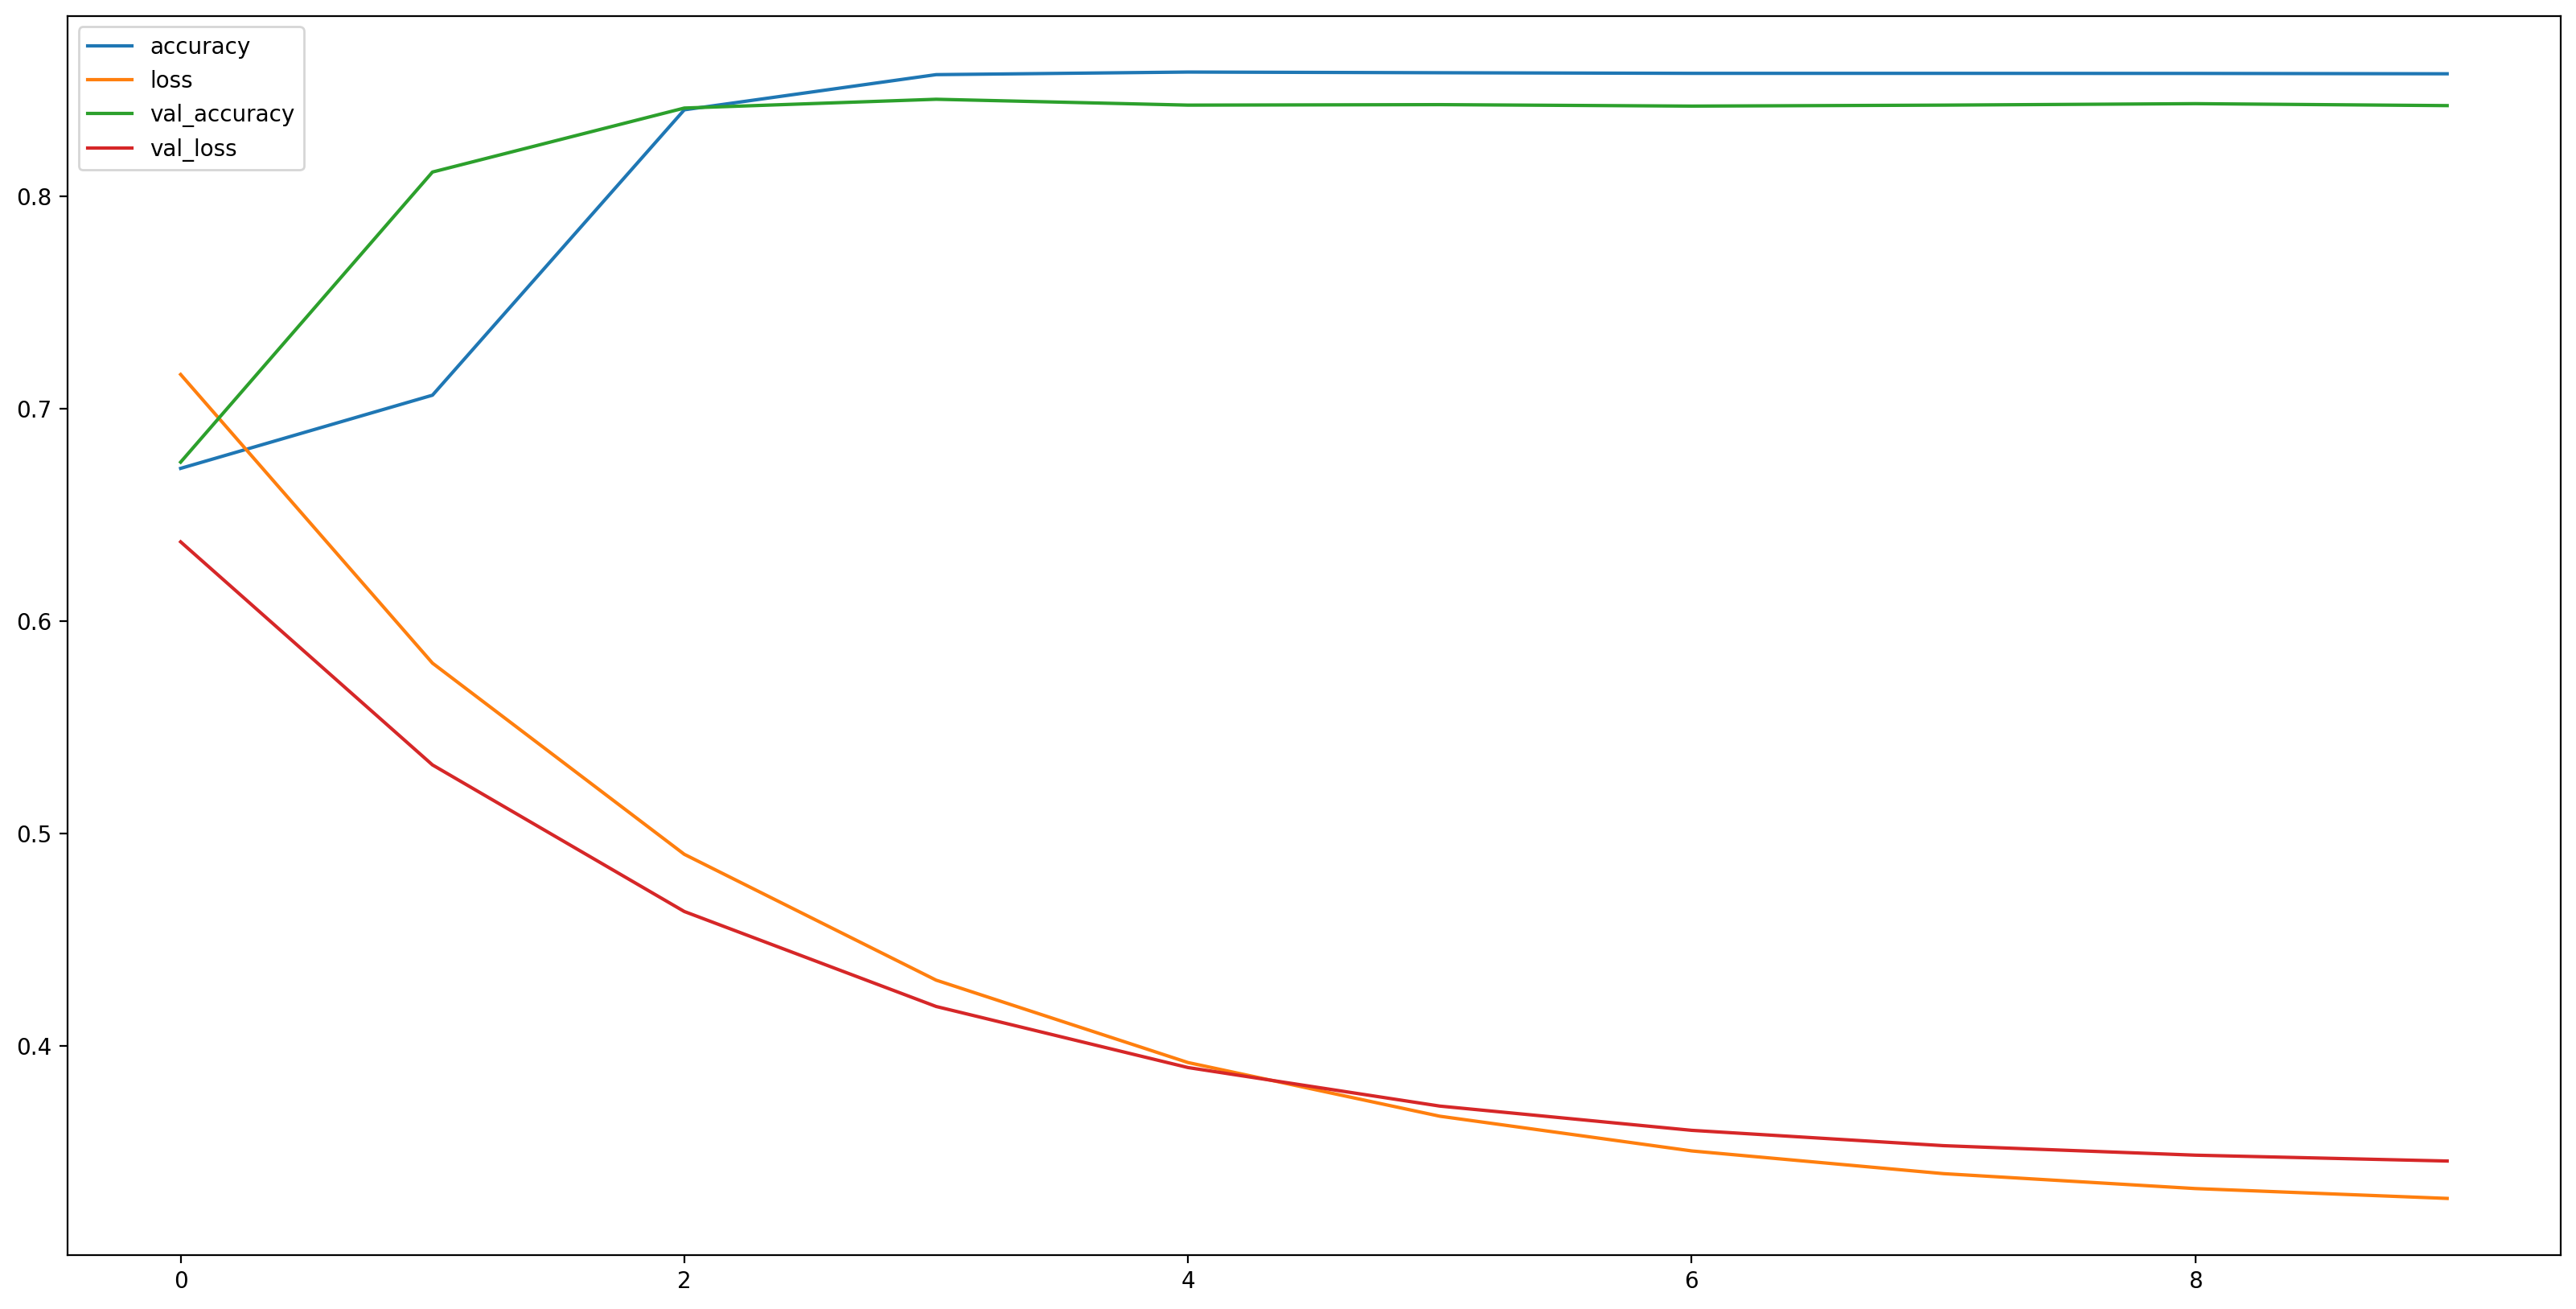

In [1055]:
hist_stacked = pd.DataFrame(history_stacked.history)
hist_stacked.plot()

In [1056]:
y_pred_stacked = stacked_model_nn.predict(stacked_test_pred)
y_pred_stacked_int = (y_pred_stacked>0.5).astype(int)

227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [1057]:
#Printing the classification report to evaluate f1 score and accuracy of the model
print(classification_report(y_test, y_pred_stacked_int))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4873
           1       0.78      0.74      0.76      2377

    accuracy                           0.84      7250
   macro avg       0.83      0.82      0.82      7250
weighted avg       0.84      0.84      0.84      7250



In [1058]:
## Make a prediction
X_onehot.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'car parking space', 'lead time', 'repeated',
       'P-C', 'P-not-C', 'average price', 'special requests',
       'type of meal_Meal Plan 2', 'type of meal_Meal Plan 3',
       'type of meal_Not Selected', 'room type_Room_Type 2',
       'room type_Room_Type 3', 'room type_Room_Type 4',
       'room type_Room_Type 5', 'room type_Room_Type 6',
       'room type_Room_Type 7', 'market segment type_Complementary',
       'market segment type_Corporate', 'market segment type_Offline',
       'market segment type_Online', 'reservation year_2016',
       'reservation year_2017', 'reservation year_2018', 'reservation month_2',
       'reservation month_3', 'reservation month_4', 'reservation month_5',
       'reservation month_6', 'reservation month_7', 'reservation month_8',
       'reservation month_9', 'reservation month_10', 'reservation month_11',
       'reservation month_12', 'r

In [1059]:
X_onehot.iloc[0].values

array([  1.,   1.,   2.,   5.,   0., 224.,   0.,   0.,   0.,  88.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.])

In [1060]:
#We can now make it as a list
list(X_onehot.iloc[0].values)

[1.0,
 1.0,
 2.0,
 5.0,
 0.0,
 224.0,
 0.0,
 0.0,
 0.0,
 88.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0]

In [1061]:
X_onehot

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,...,reservation day_28,reservation day_29,reservation day_30,reservation day_31,reservation day of the week_1,reservation day of the week_2,reservation day of the week_3,reservation day of the week_4,reservation day of the week_5,reservation day of the week_6
0,1,1,2,5,0,224,0,0,0,88.00,...,0,0,0,0,0,0,0,1,0,0
1,1,0,1,3,0,5,0,0,0,106.68,...,0,0,0,0,1,0,0,0,0,0
2,2,1,1,3,0,1,0,0,0,50.00,...,1,0,0,0,0,1,0,0,0,0
3,1,0,0,2,0,211,0,0,0,100.00,...,0,0,0,0,0,0,0,0,1,0
4,1,0,1,2,0,48,0,0,0,77.00,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0,2,0,346,0,0,0,115.00,...,0,0,0,0,0,0,1,0,0,0
36281,2,0,1,3,0,34,0,0,0,107.55,...,0,0,0,0,0,0,0,0,0,1
36282,2,0,1,3,0,83,0,0,0,105.61,...,0,0,0,0,0,1,0,0,0,0
36283,3,0,0,4,0,121,0,0,0,96.90,...,0,0,0,0,0,0,0,1,0,0


In [1062]:
test = [2.0,
 0.0,
 2.0,
 5.0,
 0.0,
 60,
 1.0,
 0.0,
 0.0,
 800.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0]


In [1063]:
test_array = np.array(test).reshape(1, -1)
test_scaled = scaler.transform(test_array)
test_scaled

C:\Users\ylazz\anaconda3\envs\tf-env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.29131991, -0.26771295,  1.37457662,  1.98569534, -0.17355747,
        -0.29682147,  6.39589825, -0.06447157, -0.08456173, 19.95425369,
        -0.7918544 , -0.31778466,  0.        , -0.40208557, -0.14633688,
        -0.02034612, -0.43441853, -0.0874311 , -0.16581415, -0.07162141,
        -0.10761439, -0.23486031,  1.56077511, -1.34336971,  0.        ,
        -0.47267558, -2.11561594, -0.22284471, -0.25449405, -0.28791958,
        -0.2887614 , -0.31329232, -0.29955626, -0.34396137, -0.38028457,
         2.40458713, -0.30010272, -0.29155529,  4.85554026, -0.17855414,
        -0.19515905, -0.18582778, -0.19324699, -0.17565461, -0.178965  ,
        -0.17101096, -0.17648732, -0.17690238, -0.18543021, -0.18976377,
        -0.19131859, -0.19131859, -0.19324699, -0.19591941, -0.1901535 ,
        -0.19705527, -0.18741074, -0.18019262, -0.17313535, -0.16091925,
        -0.17937502, -0.18383248, -0.17814246, -0.17355747, -0.18383248,
        -0.17855414, -0.18463285, -0.12807277, -0.4

### Model 1 prediction

In [1065]:
prediction = model.predict(test_scaled)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


array([[0.9863516]], dtype=float32)

In [1066]:
if prediction[0][0] > 0.5:
    result = "cancel"
else:
    result = "not cancel"

In [1067]:
print("The prediction from the first model is", prediction[0][0], "meaning the customer will", result, "the reservation") 
#since the probability is greater than 0.5

The prediction from the first model is 0.9863516 meaning the customer will cancel the reservation


### Model 2 prediction

In [1069]:
prediction2 = model2.predict(test_scaled)
prediction2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


array([[0.9995531]], dtype=float32)

In [1070]:
if prediction2[0][0] > 0.5:
    result = "cancel"
else:
    result = "not cancel"

In [1071]:
print("The prediction from the second model is", prediction2[0][0], "meaning the customer will", result, "the reservation") 
#since the probability is greater than 0.5

The prediction from the second model is 0.9995531 meaning the customer will cancel the reservation


### Stacked NN Model prediction

In [1073]:
base_pred1 = prediction.reshape(-1, 1)
base_pred2 = prediction2.reshape(-1, 1)

# Stack predictions horizontally
stacked_pred = np.hstack((base_pred1, base_pred2))

In [1074]:
final_prediction = stacked_model_nn.predict(stacked_pred)

# Interpret the result
if final_prediction[0][0] > 0.5:
    result = "cancel"
else:
    result = "not cancel"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


In [1075]:
print("The prediction from the stacked model is", final_prediction[0][0], "meaning the customer will", result, "the reservation") 
#since the probability is greater than 0.5

The prediction from the stacked model is 0.9306546 meaning the customer will cancel the reservation


### Stacked Linear Regression Prediction

In [1077]:
final_prediction_lr = stacked_model.predict(stacked_pred)

In [1078]:
final_prediction_lr

array([1], dtype=int64)

In [1170]:
# Interpret the result
if final_prediction_lr[0] == 1:
    result = "cancel"
else:
    result = "not cancel"

In [1172]:
print("The prediction from the stacked model is", final_prediction_lr[0], "meaning the customer will", result, "the reservation") 

The prediction from the stacked model is 1 meaning the customer will cancel the reservation
